In [1]:
# Run once
%load_ext autoreload
%autoreload 2
%cd ..

/Users/lena/modconn/harvard_cs282_ptg


# Preamble

In [1132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmaps
from sklearn.datasets import make_moons
import datasets
import torch
from datasets.tabular import TabularModel, TabularModelPerturb, learning_pipeline
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from similarity import get_top_k, top_k_sa, average_pairwise_score, ground_truth_score, average_ground_truth_score
from similarity import angle_diff, average_pairwise_score_grad, cosine_similarity
from util import State, get_weight_norm, get_weight_diff, linear_weight_interpolation
from tqdm import tqdm

In [25]:
class TwoMoons(Dataset):
    def __init__(self, n_samples=1000, noise=0.1, random_state=0):
        X, y = make_moons(n_samples=n_samples, noise=noise,
                          random_state=random_state)
        self.name = 'moons'
        self.data = torch.FloatTensor(X)
        self.labels = torch.LongTensor(y)

    def __len__(self):
        """Return the length of the dataset. Necessary for PyTorch's DataLoader."""
        return len(self.data)

    def __getitem__(self, idx):
        """Return the sample at index idx. Necessary for PyTorch's DataLoader."""
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        sample = self.data[idx]
        label = self.labels[idx]
        return sample, label

In [689]:
trainset = TwoMoons(n_samples=800, noise=0.15, random_state=0)
testset = TwoMoons(n_samples=200, noise=0.15, random_state=1)
X_test, y_test = testset.data.numpy(), testset.labels.numpy()
n_inputs, n_features = X_test.shape
X_train, y_train = trainset.data.numpy(), trainset.labels.numpy()

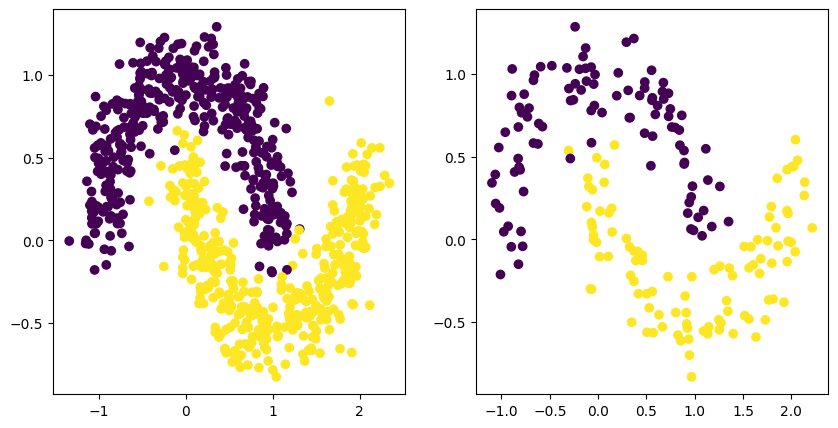

In [27]:
# Plot trainset and test set on two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(trainset.data[:, 0], trainset.data[:, 1], c=trainset.labels)
ax2.scatter(testset.data[:, 0], testset.data[:, 1], c=testset.labels)
plt.show()

# Train Models

In [1133]:
n_models = 200
config = {'n': n_models,
          'optimizer': 'sgd',
          'epochs': 100,
          'lr': 0.1,
          'batch_size': 32,
          'loo': False,
          'seed': 0,
          'mode_connect': '',
          'wandb': False}

In [718]:
States = []
for i in range(n_models):
    # Create state
    S = State(
        net=TabularModel,
        trainset=trainset,
        testset=testset,
        seed=i,
        config=config,
    )

    # Append state
    States.append(S)

In [719]:
models = []
for S in States:
    models.append(learning_pipeline(S))

Training with seed 0
Run 0


100%|██████████| 2500/2500 [00:01<00:00, 2217.48it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 1
Run 1


100%|██████████| 2500/2500 [00:01<00:00, 2226.08it/s]


Train/Test Accuracy: 0.995 0.975
Train/Test Loss: 0.32 0.331
Training with seed 2
Run 2


100%|██████████| 2500/2500 [00:01<00:00, 2245.68it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.33
Training with seed 3
Run 3


100%|██████████| 2500/2500 [00:01<00:00, 2187.77it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 4
Run 4


100%|██████████| 2500/2500 [00:01<00:00, 2223.05it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 5
Run 5


100%|██████████| 2500/2500 [00:01<00:00, 2241.19it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 6
Run 6


100%|██████████| 2500/2500 [00:01<00:00, 2226.06it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.32 0.331
Training with seed 7
Run 7


100%|██████████| 2500/2500 [00:01<00:00, 2213.43it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.331
Training with seed 8
Run 8


100%|██████████| 2500/2500 [00:01<00:00, 2179.79it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 9
Run 9


100%|██████████| 2500/2500 [00:01<00:00, 2229.02it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.332
Training with seed 10
Run 10


100%|██████████| 2500/2500 [00:01<00:00, 2174.16it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 11
Run 11


100%|██████████| 2500/2500 [00:01<00:00, 2233.69it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 12
Run 12


100%|██████████| 2500/2500 [00:01<00:00, 2214.04it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.32 0.331
Training with seed 13
Run 13


100%|██████████| 2500/2500 [00:01<00:00, 2242.80it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 14
Run 14


100%|██████████| 2500/2500 [00:01<00:00, 2242.51it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.332
Training with seed 15
Run 15


100%|██████████| 2500/2500 [00:01<00:00, 2227.91it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.33
Training with seed 16
Run 16


100%|██████████| 2500/2500 [00:01<00:00, 2238.54it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.33
Training with seed 17
Run 17


100%|██████████| 2500/2500 [00:01<00:00, 2239.21it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.33
Training with seed 18
Run 18


100%|██████████| 2500/2500 [00:01<00:00, 2244.56it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.332
Training with seed 19
Run 19


100%|██████████| 2500/2500 [00:01<00:00, 2221.01it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 20
Run 20


100%|██████████| 2500/2500 [00:01<00:00, 2100.62it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 21
Run 21


100%|██████████| 2500/2500 [00:01<00:00, 2075.19it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.319 0.331
Training with seed 22
Run 22


100%|██████████| 2500/2500 [00:01<00:00, 2181.11it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.33
Training with seed 23
Run 23


100%|██████████| 2500/2500 [00:01<00:00, 2201.59it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 24
Run 24


100%|██████████| 2500/2500 [00:01<00:00, 2204.38it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.331
Training with seed 25
Run 25


100%|██████████| 2500/2500 [00:01<00:00, 2213.00it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 26
Run 26


100%|██████████| 2500/2500 [00:01<00:00, 2229.38it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 27
Run 27


100%|██████████| 2500/2500 [00:01<00:00, 2221.53it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 28
Run 28


100%|██████████| 2500/2500 [00:01<00:00, 2225.93it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 29
Run 29


100%|██████████| 2500/2500 [00:01<00:00, 2223.59it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 30
Run 30


100%|██████████| 2500/2500 [00:01<00:00, 2225.29it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 31
Run 31


100%|██████████| 2500/2500 [00:01<00:00, 2219.48it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.331
Training with seed 32
Run 32


100%|██████████| 2500/2500 [00:01<00:00, 2157.13it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.33
Training with seed 33
Run 33


100%|██████████| 2500/2500 [00:01<00:00, 2143.84it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 34
Run 34


100%|██████████| 2500/2500 [00:01<00:00, 2183.11it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 35
Run 35


100%|██████████| 2500/2500 [00:01<00:00, 2126.84it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 36
Run 36


100%|██████████| 2500/2500 [00:01<00:00, 2217.71it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 37
Run 37


100%|██████████| 2500/2500 [00:01<00:00, 2241.49it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 38
Run 38


100%|██████████| 2500/2500 [00:01<00:00, 2259.67it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 39
Run 39


100%|██████████| 2500/2500 [00:01<00:00, 2257.35it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.33
Training with seed 40
Run 40


100%|██████████| 2500/2500 [00:01<00:00, 2235.15it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 41
Run 41


100%|██████████| 2500/2500 [00:01<00:00, 2240.90it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.32 0.329
Training with seed 42
Run 42


100%|██████████| 2500/2500 [00:01<00:00, 2205.32it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 43
Run 43


100%|██████████| 2500/2500 [00:01<00:00, 2262.74it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 44
Run 44


100%|██████████| 2500/2500 [00:01<00:00, 2249.16it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 45
Run 45


100%|██████████| 2500/2500 [00:01<00:00, 2234.63it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 46
Run 46


100%|██████████| 2500/2500 [00:01<00:00, 2251.26it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 47
Run 47


100%|██████████| 2500/2500 [00:01<00:00, 2238.38it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.333
Training with seed 48
Run 48


100%|██████████| 2500/2500 [00:01<00:00, 2233.91it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 49
Run 49


100%|██████████| 2500/2500 [00:01<00:00, 2259.70it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 50
Run 50


100%|██████████| 2500/2500 [00:01<00:00, 2260.35it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 51
Run 51


100%|██████████| 2500/2500 [00:01<00:00, 2243.25it/s]


Train/Test Accuracy: 0.994 0.98
Train/Test Loss: 0.321 0.329
Training with seed 52
Run 52


100%|██████████| 2500/2500 [00:01<00:00, 2245.37it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.332
Training with seed 53
Run 53


100%|██████████| 2500/2500 [00:01<00:00, 2247.21it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.33
Training with seed 54
Run 54


100%|██████████| 2500/2500 [00:01<00:00, 2246.31it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 55
Run 55


100%|██████████| 2500/2500 [00:01<00:00, 2235.94it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.33
Training with seed 56
Run 56


100%|██████████| 2500/2500 [00:01<00:00, 2240.38it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 57
Run 57


100%|██████████| 2500/2500 [00:01<00:00, 2245.24it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 58
Run 58


100%|██████████| 2500/2500 [00:01<00:00, 2215.52it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 59
Run 59


100%|██████████| 2500/2500 [00:01<00:00, 2254.73it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 60
Run 60


100%|██████████| 2500/2500 [00:01<00:00, 2230.80it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 61
Run 61


100%|██████████| 2500/2500 [00:01<00:00, 2251.06it/s]


Train/Test Accuracy: 0.995 0.975
Train/Test Loss: 0.321 0.33
Training with seed 62
Run 62


100%|██████████| 2500/2500 [00:01<00:00, 2265.25it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 63
Run 63


100%|██████████| 2500/2500 [00:01<00:00, 2245.33it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.32 0.329
Training with seed 64
Run 64


100%|██████████| 2500/2500 [00:01<00:00, 2245.50it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.332
Training with seed 65
Run 65


100%|██████████| 2500/2500 [00:01<00:00, 2260.98it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 66
Run 66


100%|██████████| 2500/2500 [00:01<00:00, 2250.12it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 67
Run 67


100%|██████████| 2500/2500 [00:01<00:00, 2203.34it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 68
Run 68


100%|██████████| 2500/2500 [00:01<00:00, 2259.43it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.331
Training with seed 69
Run 69


100%|██████████| 2500/2500 [00:01<00:00, 2245.71it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 70
Run 70


100%|██████████| 2500/2500 [00:01<00:00, 2251.65it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.319 0.332
Training with seed 71
Run 71


100%|██████████| 2500/2500 [00:01<00:00, 2223.14it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 72
Run 72


100%|██████████| 2500/2500 [00:01<00:00, 2208.08it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 73
Run 73


100%|██████████| 2500/2500 [00:01<00:00, 2215.61it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.33
Training with seed 74
Run 74


100%|██████████| 2500/2500 [00:01<00:00, 2232.16it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 75
Run 75


100%|██████████| 2500/2500 [00:01<00:00, 2227.23it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 76
Run 76


100%|██████████| 2500/2500 [00:01<00:00, 2236.86it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.32 0.331
Training with seed 77
Run 77


100%|██████████| 2500/2500 [00:01<00:00, 2228.39it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 78
Run 78


100%|██████████| 2500/2500 [00:01<00:00, 2207.57it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.32 0.329
Training with seed 79
Run 79


100%|██████████| 2500/2500 [00:01<00:00, 2340.95it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 80
Run 80


100%|██████████| 2500/2500 [00:01<00:00, 2251.57it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 81
Run 81


100%|██████████| 2500/2500 [00:01<00:00, 2231.67it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 82
Run 82


100%|██████████| 2500/2500 [00:01<00:00, 2243.35it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 83
Run 83


100%|██████████| 2500/2500 [00:01<00:00, 2248.11it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 84
Run 84


100%|██████████| 2500/2500 [00:01<00:00, 2239.19it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 85
Run 85


100%|██████████| 2500/2500 [00:01<00:00, 2254.97it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 86
Run 86


100%|██████████| 2500/2500 [00:01<00:00, 2247.51it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 87
Run 87


100%|██████████| 2500/2500 [00:01<00:00, 2240.07it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 88
Run 88


100%|██████████| 2500/2500 [00:01<00:00, 2238.84it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 89
Run 89


100%|██████████| 2500/2500 [00:01<00:00, 2243.50it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.32 0.331
Training with seed 90
Run 90


100%|██████████| 2500/2500 [00:01<00:00, 2252.09it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.33
Training with seed 91
Run 91


100%|██████████| 2500/2500 [00:01<00:00, 2179.15it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.331
Training with seed 92
Run 92


100%|██████████| 2500/2500 [00:01<00:00, 2243.61it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 93
Run 93


100%|██████████| 2500/2500 [00:01<00:00, 2241.02it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 94
Run 94


100%|██████████| 2500/2500 [00:01<00:00, 2237.61it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.33
Training with seed 95
Run 95


100%|██████████| 2500/2500 [00:01<00:00, 2257.55it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 96
Run 96


100%|██████████| 2500/2500 [00:01<00:00, 2246.53it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 97
Run 97


100%|██████████| 2500/2500 [00:01<00:00, 2251.42it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.319 0.331
Training with seed 98
Run 98


100%|██████████| 2500/2500 [00:01<00:00, 2242.94it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.33
Training with seed 99
Run 99


100%|██████████| 2500/2500 [00:01<00:00, 2216.63it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.331
Training with seed 100
Run 100


100%|██████████| 2500/2500 [00:01<00:00, 2232.69it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 101
Run 101


100%|██████████| 2500/2500 [00:01<00:00, 2242.66it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 102
Run 102


100%|██████████| 2500/2500 [00:01<00:00, 2251.80it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 103
Run 103


100%|██████████| 2500/2500 [00:01<00:00, 2244.85it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.319 0.332
Training with seed 104
Run 104


100%|██████████| 2500/2500 [00:01<00:00, 2242.75it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 105
Run 105


100%|██████████| 2500/2500 [00:01<00:00, 2249.16it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.33
Training with seed 106
Run 106


100%|██████████| 2500/2500 [00:01<00:00, 2252.64it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.332
Training with seed 107
Run 107


100%|██████████| 2500/2500 [00:01<00:00, 2247.78it/s]


Train/Test Accuracy: 0.995 0.975
Train/Test Loss: 0.321 0.33
Training with seed 108
Run 108


100%|██████████| 2500/2500 [00:01<00:00, 2232.88it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.33
Training with seed 109
Run 109


100%|██████████| 2500/2500 [00:01<00:00, 2241.04it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.32 0.329
Training with seed 110
Run 110


100%|██████████| 2500/2500 [00:01<00:00, 2241.88it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 111
Run 111


100%|██████████| 2500/2500 [00:01<00:00, 2225.48it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 112
Run 112


100%|██████████| 2500/2500 [00:01<00:00, 2230.75it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 113
Run 113


100%|██████████| 2500/2500 [00:01<00:00, 2214.11it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 114
Run 114


100%|██████████| 2500/2500 [00:01<00:00, 2169.55it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 115
Run 115


100%|██████████| 2500/2500 [00:01<00:00, 2081.33it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 116
Run 116


100%|██████████| 2500/2500 [00:01<00:00, 2157.70it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.32 0.329
Training with seed 117
Run 117


100%|██████████| 2500/2500 [00:01<00:00, 2190.08it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 118
Run 118


100%|██████████| 2500/2500 [00:01<00:00, 2236.19it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.32 0.331
Training with seed 119
Run 119


100%|██████████| 2500/2500 [00:01<00:00, 2238.62it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 120
Run 120


100%|██████████| 2500/2500 [00:01<00:00, 2233.67it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 121
Run 121


100%|██████████| 2500/2500 [00:01<00:00, 2219.69it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 122
Run 122


100%|██████████| 2500/2500 [00:01<00:00, 2214.65it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 123
Run 123


100%|██████████| 2500/2500 [00:01<00:00, 2223.61it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 124
Run 124


100%|██████████| 2500/2500 [00:01<00:00, 2218.12it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 125
Run 125


100%|██████████| 2500/2500 [00:01<00:00, 2207.58it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 126
Run 126


100%|██████████| 2500/2500 [00:01<00:00, 2212.49it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 127
Run 127


100%|██████████| 2500/2500 [00:01<00:00, 2213.34it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.33
Training with seed 128
Run 128


100%|██████████| 2500/2500 [00:01<00:00, 2150.98it/s]


Train/Test Accuracy: 0.994 0.98
Train/Test Loss: 0.32 0.329
Training with seed 129
Run 129


100%|██████████| 2500/2500 [00:01<00:00, 2172.28it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.33
Training with seed 130
Run 130


100%|██████████| 2500/2500 [00:01<00:00, 2198.96it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.331
Training with seed 131
Run 131


100%|██████████| 2500/2500 [00:01<00:00, 2052.51it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 132
Run 132


100%|██████████| 2500/2500 [00:01<00:00, 2067.75it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 133
Run 133


100%|██████████| 2500/2500 [00:01<00:00, 2069.79it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 134
Run 134


100%|██████████| 2500/2500 [00:01<00:00, 2168.37it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 135
Run 135


100%|██████████| 2500/2500 [00:01<00:00, 2213.10it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 136
Run 136


100%|██████████| 2500/2500 [00:01<00:00, 2184.58it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 137
Run 137


100%|██████████| 2500/2500 [00:01<00:00, 2125.58it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 138
Run 138


100%|██████████| 2500/2500 [00:01<00:00, 2218.57it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 139
Run 139


100%|██████████| 2500/2500 [00:01<00:00, 2210.77it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.319 0.332
Training with seed 140
Run 140


100%|██████████| 2500/2500 [00:01<00:00, 2211.72it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 141
Run 141


100%|██████████| 2500/2500 [00:01<00:00, 2078.67it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.33
Training with seed 142
Run 142


100%|██████████| 2500/2500 [00:01<00:00, 2230.58it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 143
Run 143


100%|██████████| 2500/2500 [00:01<00:00, 2226.78it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 144
Run 144


100%|██████████| 2500/2500 [00:01<00:00, 2233.81it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.32 0.332
Training with seed 145
Run 145


100%|██████████| 2500/2500 [00:01<00:00, 2231.14it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.319 0.331
Training with seed 146
Run 146


100%|██████████| 2500/2500 [00:01<00:00, 2217.01it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 147
Run 147


100%|██████████| 2500/2500 [00:01<00:00, 2249.11it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.32 0.329
Training with seed 148
Run 148


100%|██████████| 2500/2500 [00:01<00:00, 2138.07it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 149
Run 149


100%|██████████| 2500/2500 [00:01<00:00, 2227.77it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.33
Training with seed 150
Run 150


100%|██████████| 2500/2500 [00:01<00:00, 2236.06it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 151
Run 151


100%|██████████| 2500/2500 [00:01<00:00, 2252.41it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 152
Run 152


100%|██████████| 2500/2500 [00:01<00:00, 2098.68it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.32 0.331
Training with seed 153
Run 153


100%|██████████| 2500/2500 [00:01<00:00, 2010.67it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.332
Training with seed 154
Run 154


100%|██████████| 2500/2500 [00:01<00:00, 2106.97it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 155
Run 155


100%|██████████| 2500/2500 [00:01<00:00, 1957.70it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 156
Run 156


100%|██████████| 2500/2500 [00:01<00:00, 2167.56it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.32 0.332
Training with seed 157
Run 157


100%|██████████| 2500/2500 [00:01<00:00, 2019.71it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 158
Run 158


100%|██████████| 2500/2500 [00:01<00:00, 2202.56it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 159
Run 159


100%|██████████| 2500/2500 [00:01<00:00, 2234.40it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.32 0.331
Training with seed 160
Run 160


100%|██████████| 2500/2500 [00:01<00:00, 2240.86it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.32 0.329
Training with seed 161
Run 161


100%|██████████| 2500/2500 [00:01<00:00, 2243.15it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.32 0.331
Training with seed 162
Run 162


100%|██████████| 2500/2500 [00:01<00:00, 2232.51it/s]


Train/Test Accuracy: 0.995 0.975
Train/Test Loss: 0.32 0.331
Training with seed 163
Run 163


100%|██████████| 2500/2500 [00:01<00:00, 2249.50it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 164
Run 164


100%|██████████| 2500/2500 [00:01<00:00, 2240.87it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 165
Run 165


100%|██████████| 2500/2500 [00:01<00:00, 2239.57it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.33
Training with seed 166
Run 166


100%|██████████| 2500/2500 [00:01<00:00, 2243.21it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 167
Run 167


100%|██████████| 2500/2500 [00:01<00:00, 2227.87it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 168
Run 168


100%|██████████| 2500/2500 [00:01<00:00, 2243.99it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 169
Run 169


100%|██████████| 2500/2500 [00:01<00:00, 2231.99it/s]


Train/Test Accuracy: 0.995 0.975
Train/Test Loss: 0.321 0.329
Training with seed 170
Run 170


100%|██████████| 2500/2500 [00:01<00:00, 2259.93it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.332
Training with seed 171
Run 171


100%|██████████| 2500/2500 [00:01<00:00, 2264.66it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 172
Run 172


100%|██████████| 2500/2500 [00:01<00:00, 2261.48it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 173
Run 173


100%|██████████| 2500/2500 [00:01<00:00, 2253.33it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.33
Training with seed 174
Run 174


100%|██████████| 2500/2500 [00:01<00:00, 2059.00it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 175
Run 175


100%|██████████| 2500/2500 [00:01<00:00, 2321.26it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 176
Run 176


100%|██████████| 2500/2500 [00:01<00:00, 2257.96it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 177
Run 177


100%|██████████| 2500/2500 [00:01<00:00, 2239.32it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 178
Run 178


100%|██████████| 2500/2500 [00:01<00:00, 2255.14it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 179
Run 179


100%|██████████| 2500/2500 [00:01<00:00, 2244.72it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.33
Training with seed 180
Run 180


100%|██████████| 2500/2500 [00:01<00:00, 2241.11it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 181
Run 181


100%|██████████| 2500/2500 [00:01<00:00, 2261.36it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 182
Run 182


100%|██████████| 2500/2500 [00:01<00:00, 2259.58it/s]


Train/Test Accuracy: 0.995 0.975
Train/Test Loss: 0.321 0.329
Training with seed 183
Run 183


100%|██████████| 2500/2500 [00:01<00:00, 2213.65it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 184
Run 184


100%|██████████| 2500/2500 [00:01<00:00, 2208.46it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 185
Run 185


100%|██████████| 2500/2500 [00:01<00:00, 2233.14it/s]


Train/Test Accuracy: 0.996 0.975
Train/Test Loss: 0.319 0.333
Training with seed 186
Run 186


100%|██████████| 2500/2500 [00:01<00:00, 2262.69it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.329
Training with seed 187
Run 187


100%|██████████| 2500/2500 [00:01<00:00, 2195.51it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 188
Run 188


100%|██████████| 2500/2500 [00:01<00:00, 2226.67it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.32 0.33
Training with seed 189
Run 189


100%|██████████| 2500/2500 [00:01<00:00, 2242.43it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.332
Training with seed 190
Run 190


100%|██████████| 2500/2500 [00:01<00:00, 2250.77it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.321 0.33
Training with seed 191
Run 191


100%|██████████| 2500/2500 [00:01<00:00, 2221.17it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.32 0.331
Training with seed 192
Run 192


100%|██████████| 2500/2500 [00:01<00:00, 2247.30it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.33
Training with seed 193
Run 193


100%|██████████| 2500/2500 [00:01<00:00, 2251.26it/s]


Train/Test Accuracy: 0.995 0.985
Train/Test Loss: 0.321 0.329
Training with seed 194
Run 194


100%|██████████| 2500/2500 [00:01<00:00, 2244.48it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.331
Training with seed 195
Run 195


100%|██████████| 2500/2500 [00:01<00:00, 2244.31it/s]


Train/Test Accuracy: 0.995 0.975
Train/Test Loss: 0.32 0.332
Training with seed 196
Run 196


100%|██████████| 2500/2500 [00:01<00:00, 2240.76it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.331
Training with seed 197
Run 197


100%|██████████| 2500/2500 [00:01<00:00, 2257.21it/s]


Train/Test Accuracy: 0.996 0.98
Train/Test Loss: 0.319 0.33
Training with seed 198
Run 198


100%|██████████| 2500/2500 [00:01<00:00, 2264.23it/s]


Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.32 0.331
Training with seed 199
Run 199


100%|██████████| 2500/2500 [00:01<00:00, 2284.01it/s]

Train/Test Accuracy: 0.996 0.985
Train/Test Loss: 0.319 0.33


In [600]:
mode_models = []
for S in States:
    S.config['mode_connect'] = 'bezier'
    mode_models.append(learning_pipeline(S))

Training with seed 0
Run 0


100%|██████████| 2500/2500 [00:02<00:00, 1096.34it/s]


Train/Test Accuracy: 0.988 0.98
Train/Test Loss: 0.337 0.34
Training with seed 1
Run 1


100%|██████████| 2500/2500 [00:02<00:00, 1115.85it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.329 0.331
Training with seed 2
Run 2


100%|██████████| 2500/2500 [00:02<00:00, 1126.73it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.326 0.333
Training with seed 3
Run 3


100%|██████████| 2500/2500 [00:02<00:00, 1120.62it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.327 0.334
Training with seed 4
Run 4


100%|██████████| 2500/2500 [00:02<00:00, 1127.31it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.326 0.332
Training with seed 5
Run 5


100%|██████████| 2500/2500 [00:02<00:00, 1112.56it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.327 0.331
Training with seed 6
Run 6


100%|██████████| 2500/2500 [00:02<00:00, 1114.47it/s]


Train/Test Accuracy: 0.988 0.98
Train/Test Loss: 0.329 0.333
Training with seed 7
Run 7


100%|██████████| 2500/2500 [00:02<00:00, 1114.60it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.327 0.331
Training with seed 8
Run 8


100%|██████████| 2500/2500 [00:02<00:00, 1119.88it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.329 0.332
Training with seed 9
Run 9


100%|██████████| 2500/2500 [00:02<00:00, 1118.25it/s]


Train/Test Accuracy: 0.988 0.975
Train/Test Loss: 0.33 0.331
Training with seed 10
Run 10


100%|██████████| 2500/2500 [00:02<00:00, 1107.50it/s]


Train/Test Accuracy: 0.989 0.985
Train/Test Loss: 0.337 0.335
Training with seed 11
Run 11


100%|██████████| 2500/2500 [00:02<00:00, 1096.12it/s]


Train/Test Accuracy: 0.994 0.985
Train/Test Loss: 0.326 0.331
Training with seed 12
Run 12


100%|██████████| 2500/2500 [00:02<00:00, 1082.60it/s]


Train/Test Accuracy: 0.988 0.985
Train/Test Loss: 0.331 0.337
Training with seed 13
Run 13


100%|██████████| 2500/2500 [00:02<00:00, 1099.34it/s]


Train/Test Accuracy: 0.991 0.985
Train/Test Loss: 0.326 0.33
Training with seed 14
Run 14


100%|██████████| 2500/2500 [00:02<00:00, 1108.32it/s]


Train/Test Accuracy: 0.986 0.98
Train/Test Loss: 0.334 0.334
Training with seed 15
Run 15


100%|██████████| 2500/2500 [00:02<00:00, 1103.89it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.326 0.331
Training with seed 16
Run 16


100%|██████████| 2500/2500 [00:02<00:00, 1114.12it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.328 0.331
Training with seed 17
Run 17


100%|██████████| 2500/2500 [00:02<00:00, 1113.33it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.327 0.331
Training with seed 18
Run 18


100%|██████████| 2500/2500 [00:02<00:00, 1115.40it/s]


Train/Test Accuracy: 0.995 0.975
Train/Test Loss: 0.325 0.331
Training with seed 19
Run 19


100%|██████████| 2500/2500 [00:02<00:00, 1117.65it/s]


Train/Test Accuracy: 0.988 0.985
Train/Test Loss: 0.334 0.332
Training with seed 20
Run 20


100%|██████████| 2500/2500 [00:02<00:00, 1100.19it/s]


Train/Test Accuracy: 0.993 0.985
Train/Test Loss: 0.327 0.33
Training with seed 21
Run 21


100%|██████████| 2500/2500 [00:02<00:00, 1099.45it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.324 0.332
Training with seed 22
Run 22


100%|██████████| 2500/2500 [00:02<00:00, 1119.85it/s]


Train/Test Accuracy: 0.989 0.985
Train/Test Loss: 0.329 0.333
Training with seed 23
Run 23


100%|██████████| 2500/2500 [00:02<00:00, 1110.32it/s]


Train/Test Accuracy: 0.991 0.99
Train/Test Loss: 0.326 0.33
Training with seed 24
Run 24


100%|██████████| 2500/2500 [00:02<00:00, 1110.00it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.328 0.333
Training with seed 25
Run 25


100%|██████████| 2500/2500 [00:02<00:00, 1094.92it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.331 0.337
Training with seed 26
Run 26


100%|██████████| 2500/2500 [00:02<00:00, 1098.10it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.328 0.33
Training with seed 27
Run 27


100%|██████████| 2500/2500 [00:02<00:00, 1101.28it/s]


Train/Test Accuracy: 0.989 0.975
Train/Test Loss: 0.333 0.335
Training with seed 28
Run 28


100%|██████████| 2500/2500 [00:02<00:00, 1111.93it/s]


Train/Test Accuracy: 0.989 0.975
Train/Test Loss: 0.332 0.336
Training with seed 29
Run 29


100%|██████████| 2500/2500 [00:02<00:00, 1040.08it/s]


Train/Test Accuracy: 0.988 0.975
Train/Test Loss: 0.328 0.333
Training with seed 30
Run 30


100%|██████████| 2500/2500 [00:02<00:00, 1067.80it/s]


Train/Test Accuracy: 0.985 0.985
Train/Test Loss: 0.331 0.333
Training with seed 31
Run 31


100%|██████████| 2500/2500 [00:02<00:00, 1060.59it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.328 0.331
Training with seed 32
Run 32


100%|██████████| 2500/2500 [00:02<00:00, 1112.37it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.326 0.331
Training with seed 33
Run 33


100%|██████████| 2500/2500 [00:02<00:00, 1121.27it/s]


Train/Test Accuracy: 0.985 0.985
Train/Test Loss: 0.332 0.333
Training with seed 34
Run 34


100%|██████████| 2500/2500 [00:02<00:00, 1120.57it/s]


Train/Test Accuracy: 0.988 0.98
Train/Test Loss: 0.33 0.332
Training with seed 35
Run 35


100%|██████████| 2500/2500 [00:02<00:00, 1123.90it/s]


Train/Test Accuracy: 0.991 0.985
Train/Test Loss: 0.325 0.329
Training with seed 36
Run 36


100%|██████████| 2500/2500 [00:02<00:00, 1127.32it/s]


Train/Test Accuracy: 0.99 0.975
Train/Test Loss: 0.33 0.334
Training with seed 37
Run 37


100%|██████████| 2500/2500 [00:02<00:00, 1127.94it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.326 0.335
Training with seed 38
Run 38


100%|██████████| 2500/2500 [00:02<00:00, 1129.85it/s]


Train/Test Accuracy: 0.989 0.985
Train/Test Loss: 0.329 0.331
Training with seed 39
Run 39


100%|██████████| 2500/2500 [00:02<00:00, 1129.97it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.328 0.332
Training with seed 40
Run 40


100%|██████████| 2500/2500 [00:02<00:00, 1120.66it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.333
Training with seed 41
Run 41


100%|██████████| 2500/2500 [00:02<00:00, 1080.59it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.326 0.333
Training with seed 42
Run 42


100%|██████████| 2500/2500 [00:02<00:00, 1118.69it/s]


Train/Test Accuracy: 0.989 0.985
Train/Test Loss: 0.326 0.334
Training with seed 43
Run 43


100%|██████████| 2500/2500 [00:02<00:00, 1117.99it/s]


Train/Test Accuracy: 0.991 0.975
Train/Test Loss: 0.324 0.333
Training with seed 44
Run 44


100%|██████████| 2500/2500 [00:02<00:00, 1128.07it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.328 0.331
Training with seed 45
Run 45


100%|██████████| 2500/2500 [00:02<00:00, 1123.52it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.33 0.331
Training with seed 46
Run 46


100%|██████████| 2500/2500 [00:02<00:00, 1124.59it/s]


Train/Test Accuracy: 0.986 0.985
Train/Test Loss: 0.332 0.332
Training with seed 47
Run 47


100%|██████████| 2500/2500 [00:02<00:00, 1128.89it/s]


Train/Test Accuracy: 0.991 0.99
Train/Test Loss: 0.328 0.329
Training with seed 48
Run 48


100%|██████████| 2500/2500 [00:02<00:00, 1120.15it/s]


Train/Test Accuracy: 0.991 0.99
Train/Test Loss: 0.327 0.329
Training with seed 49
Run 49


100%|██████████| 2500/2500 [00:02<00:00, 1132.59it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.331
Training with seed 50
Run 50


100%|██████████| 2500/2500 [00:02<00:00, 1050.95it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.326 0.333
Training with seed 51
Run 51


100%|██████████| 2500/2500 [00:02<00:00, 1040.94it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.326 0.331
Training with seed 52
Run 52


100%|██████████| 2500/2500 [00:02<00:00, 1047.56it/s]


Train/Test Accuracy: 0.986 0.98
Train/Test Loss: 0.328 0.333
Training with seed 53
Run 53


100%|██████████| 2500/2500 [00:02<00:00, 1101.80it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.325 0.333
Training with seed 54
Run 54


100%|██████████| 2500/2500 [00:02<00:00, 1081.69it/s]


Train/Test Accuracy: 0.99 0.975
Train/Test Loss: 0.326 0.331
Training with seed 55
Run 55


100%|██████████| 2500/2500 [00:02<00:00, 1120.11it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.325 0.332
Training with seed 56
Run 56


100%|██████████| 2500/2500 [00:02<00:00, 1131.51it/s]


Train/Test Accuracy: 0.991 0.975
Train/Test Loss: 0.326 0.335
Training with seed 57
Run 57


100%|██████████| 2500/2500 [00:02<00:00, 1132.72it/s]


Train/Test Accuracy: 0.988 0.98
Train/Test Loss: 0.326 0.332
Training with seed 58
Run 58


100%|██████████| 2500/2500 [00:02<00:00, 1126.77it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.327 0.332
Training with seed 59
Run 59


100%|██████████| 2500/2500 [00:02<00:00, 1121.15it/s]


Train/Test Accuracy: 0.99 0.975
Train/Test Loss: 0.329 0.331
Training with seed 60
Run 60


100%|██████████| 2500/2500 [00:02<00:00, 1135.97it/s]


Train/Test Accuracy: 0.993 0.985
Train/Test Loss: 0.327 0.331
Training with seed 61
Run 61


100%|██████████| 2500/2500 [00:02<00:00, 1139.31it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.33 0.335
Training with seed 62
Run 62


100%|██████████| 2500/2500 [00:02<00:00, 1139.32it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.327 0.333
Training with seed 63
Run 63


100%|██████████| 2500/2500 [00:02<00:00, 1137.85it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.327 0.335
Training with seed 64
Run 64


100%|██████████| 2500/2500 [00:02<00:00, 1136.73it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.326 0.332
Training with seed 65
Run 65


100%|██████████| 2500/2500 [00:02<00:00, 1133.31it/s]


Train/Test Accuracy: 0.99 0.975
Train/Test Loss: 0.329 0.332
Training with seed 66
Run 66


100%|██████████| 2500/2500 [00:02<00:00, 1126.73it/s]


Train/Test Accuracy: 0.988 0.985
Train/Test Loss: 0.329 0.333
Training with seed 67
Run 67


100%|██████████| 2500/2500 [00:02<00:00, 1123.27it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.325 0.332
Training with seed 68
Run 68


100%|██████████| 2500/2500 [00:02<00:00, 1137.34it/s]


Train/Test Accuracy: 0.988 0.98
Train/Test Loss: 0.329 0.334
Training with seed 69
Run 69


100%|██████████| 2500/2500 [00:02<00:00, 1137.88it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.331 0.332
Training with seed 70
Run 70


100%|██████████| 2500/2500 [00:02<00:00, 1135.49it/s]


Train/Test Accuracy: 0.995 0.98
Train/Test Loss: 0.325 0.332
Training with seed 71
Run 71


100%|██████████| 2500/2500 [00:02<00:00, 1138.81it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.326 0.332
Training with seed 72
Run 72


100%|██████████| 2500/2500 [00:02<00:00, 1133.64it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.332
Training with seed 73
Run 73


100%|██████████| 2500/2500 [00:02<00:00, 1139.62it/s]


Train/Test Accuracy: 0.993 0.985
Train/Test Loss: 0.325 0.332
Training with seed 74
Run 74


100%|██████████| 2500/2500 [00:02<00:00, 1139.36it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.329 0.333
Training with seed 75
Run 75


100%|██████████| 2500/2500 [00:02<00:00, 1138.39it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.332
Training with seed 76
Run 76


100%|██████████| 2500/2500 [00:02<00:00, 1144.14it/s]


Train/Test Accuracy: 0.989 0.985
Train/Test Loss: 0.327 0.334
Training with seed 77
Run 77


100%|██████████| 2500/2500 [00:02<00:00, 1140.81it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.326 0.333
Training with seed 78
Run 78


100%|██████████| 2500/2500 [00:02<00:00, 1136.86it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.327 0.328
Training with seed 79
Run 79


100%|██████████| 2500/2500 [00:02<00:00, 1131.61it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.327 0.33
Training with seed 80
Run 80


100%|██████████| 2500/2500 [00:02<00:00, 1124.92it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.326 0.331
Training with seed 81
Run 81


100%|██████████| 2500/2500 [00:02<00:00, 1123.95it/s]


Train/Test Accuracy: 0.99 0.975
Train/Test Loss: 0.327 0.331
Training with seed 82
Run 82


100%|██████████| 2500/2500 [00:02<00:00, 1130.51it/s]


Train/Test Accuracy: 0.985 0.985
Train/Test Loss: 0.332 0.335
Training with seed 83
Run 83


100%|██████████| 2500/2500 [00:02<00:00, 1134.86it/s]


Train/Test Accuracy: 0.986 0.985
Train/Test Loss: 0.328 0.332
Training with seed 84
Run 84


100%|██████████| 2500/2500 [00:02<00:00, 1124.78it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.327 0.333
Training with seed 85
Run 85


100%|██████████| 2500/2500 [00:02<00:00, 1130.07it/s]


Train/Test Accuracy: 0.994 0.985
Train/Test Loss: 0.327 0.332
Training with seed 86
Run 86


100%|██████████| 2500/2500 [00:02<00:00, 1133.67it/s]


Train/Test Accuracy: 0.988 0.985
Train/Test Loss: 0.331 0.331
Training with seed 87
Run 87


100%|██████████| 2500/2500 [00:02<00:00, 1127.12it/s]


Train/Test Accuracy: 0.986 0.98
Train/Test Loss: 0.33 0.332
Training with seed 88
Run 88


100%|██████████| 2500/2500 [00:02<00:00, 1134.69it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.33 0.333
Training with seed 89
Run 89


100%|██████████| 2500/2500 [00:02<00:00, 1132.68it/s]


Train/Test Accuracy: 0.988 0.985
Train/Test Loss: 0.336 0.334
Training with seed 90
Run 90


100%|██████████| 2500/2500 [00:02<00:00, 1136.19it/s]


Train/Test Accuracy: 0.991 0.985
Train/Test Loss: 0.327 0.332
Training with seed 91
Run 91


100%|██████████| 2500/2500 [00:02<00:00, 1137.02it/s]


Train/Test Accuracy: 0.991 0.985
Train/Test Loss: 0.326 0.332
Training with seed 92
Run 92


100%|██████████| 2500/2500 [00:02<00:00, 1133.60it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.327 0.33
Training with seed 93
Run 93


100%|██████████| 2500/2500 [00:02<00:00, 1134.32it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.328 0.334
Training with seed 94
Run 94


100%|██████████| 2500/2500 [00:02<00:00, 1132.73it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.332
Training with seed 95
Run 95


100%|██████████| 2500/2500 [00:02<00:00, 1125.37it/s]


Train/Test Accuracy: 0.994 0.985
Train/Test Loss: 0.324 0.329
Training with seed 96
Run 96


100%|██████████| 2500/2500 [00:02<00:00, 1123.08it/s]


Train/Test Accuracy: 0.989 0.985
Train/Test Loss: 0.33 0.331
Training with seed 97
Run 97


100%|██████████| 2500/2500 [00:02<00:00, 1134.41it/s]


Train/Test Accuracy: 0.989 0.99
Train/Test Loss: 0.327 0.329
Training with seed 98
Run 98


100%|██████████| 2500/2500 [00:02<00:00, 1132.58it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.33 0.333
Training with seed 99
Run 99


100%|██████████| 2500/2500 [00:02<00:00, 1131.76it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.325 0.332
Training with seed 100
Run 100


100%|██████████| 2500/2500 [00:02<00:00, 1131.34it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.324 0.334
Training with seed 101
Run 101


100%|██████████| 2500/2500 [00:02<00:00, 1133.42it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.327 0.332
Training with seed 102
Run 102


100%|██████████| 2500/2500 [00:02<00:00, 1129.71it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.329 0.332
Training with seed 103
Run 103


100%|██████████| 2500/2500 [00:02<00:00, 1125.04it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.326 0.332
Training with seed 104
Run 104


100%|██████████| 2500/2500 [00:02<00:00, 1092.39it/s]


Train/Test Accuracy: 0.986 0.98
Train/Test Loss: 0.33 0.334
Training with seed 105
Run 105


100%|██████████| 2500/2500 [00:02<00:00, 1015.39it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.328 0.33
Training with seed 106
Run 106


100%|██████████| 2500/2500 [00:02<00:00, 1075.71it/s]


Train/Test Accuracy: 0.993 0.99
Train/Test Loss: 0.329 0.334
Training with seed 107
Run 107


100%|██████████| 2500/2500 [00:02<00:00, 1056.22it/s]


Train/Test Accuracy: 0.986 0.99
Train/Test Loss: 0.332 0.331
Training with seed 108
Run 108


100%|██████████| 2500/2500 [00:02<00:00, 1043.99it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.328 0.332
Training with seed 109
Run 109


100%|██████████| 2500/2500 [00:02<00:00, 1105.49it/s]


Train/Test Accuracy: 0.993 0.985
Train/Test Loss: 0.329 0.331
Training with seed 110
Run 110


100%|██████████| 2500/2500 [00:02<00:00, 1119.61it/s]


Train/Test Accuracy: 0.986 0.985
Train/Test Loss: 0.334 0.336
Training with seed 111
Run 111


100%|██████████| 2500/2500 [00:02<00:00, 1129.20it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.325 0.332
Training with seed 112
Run 112


100%|██████████| 2500/2500 [00:02<00:00, 1124.51it/s]


Train/Test Accuracy: 0.993 0.985
Train/Test Loss: 0.325 0.329
Training with seed 113
Run 113


100%|██████████| 2500/2500 [00:02<00:00, 1123.10it/s]


Train/Test Accuracy: 0.99 0.975
Train/Test Loss: 0.328 0.332
Training with seed 114
Run 114


100%|██████████| 2500/2500 [00:02<00:00, 1118.12it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.328 0.33
Training with seed 115
Run 115


100%|██████████| 2500/2500 [00:02<00:00, 1160.08it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.329 0.331
Training with seed 116
Run 116


100%|██████████| 2500/2500 [00:02<00:00, 1122.34it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.331 0.329
Training with seed 117
Run 117


100%|██████████| 2500/2500 [00:02<00:00, 1134.30it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.329 0.335
Training with seed 118
Run 118


100%|██████████| 2500/2500 [00:02<00:00, 1132.28it/s]


Train/Test Accuracy: 0.99 0.99
Train/Test Loss: 0.328 0.332
Training with seed 119
Run 119


100%|██████████| 2500/2500 [00:02<00:00, 1116.38it/s]


Train/Test Accuracy: 0.991 0.985
Train/Test Loss: 0.33 0.333
Training with seed 120
Run 120


100%|██████████| 2500/2500 [00:02<00:00, 1130.73it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.334
Training with seed 121
Run 121


100%|██████████| 2500/2500 [00:02<00:00, 1129.43it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.33 0.336
Training with seed 122
Run 122


100%|██████████| 2500/2500 [00:02<00:00, 1125.95it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.33 0.333
Training with seed 123
Run 123


100%|██████████| 2500/2500 [00:02<00:00, 1124.98it/s]


Train/Test Accuracy: 0.991 0.985
Train/Test Loss: 0.325 0.332
Training with seed 124
Run 124


100%|██████████| 2500/2500 [00:02<00:00, 1127.51it/s]


Train/Test Accuracy: 0.988 0.98
Train/Test Loss: 0.328 0.329
Training with seed 125
Run 125


100%|██████████| 2500/2500 [00:02<00:00, 1133.57it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.326 0.332
Training with seed 126
Run 126


100%|██████████| 2500/2500 [00:02<00:00, 1126.90it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.329 0.33
Training with seed 127
Run 127


100%|██████████| 2500/2500 [00:02<00:00, 1123.91it/s]


Train/Test Accuracy: 0.994 0.98
Train/Test Loss: 0.328 0.33
Training with seed 128
Run 128


100%|██████████| 2500/2500 [00:02<00:00, 1131.42it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.328 0.33
Training with seed 129
Run 129


100%|██████████| 2500/2500 [00:02<00:00, 1126.22it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.33 0.332
Training with seed 130
Run 130


100%|██████████| 2500/2500 [00:02<00:00, 1135.02it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.33 0.331
Training with seed 131
Run 131


100%|██████████| 2500/2500 [00:02<00:00, 1133.20it/s]


Train/Test Accuracy: 0.988 0.98
Train/Test Loss: 0.324 0.333
Training with seed 132
Run 132


100%|██████████| 2500/2500 [00:02<00:00, 1131.93it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.332
Training with seed 133
Run 133


100%|██████████| 2500/2500 [00:02<00:00, 1131.34it/s]


Train/Test Accuracy: 0.986 0.98
Train/Test Loss: 0.329 0.335
Training with seed 134
Run 134


100%|██████████| 2500/2500 [00:02<00:00, 1136.37it/s]


Train/Test Accuracy: 0.994 0.985
Train/Test Loss: 0.324 0.33
Training with seed 135
Run 135


100%|██████████| 2500/2500 [00:02<00:00, 1136.18it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.33 0.334
Training with seed 136
Run 136


100%|██████████| 2500/2500 [00:02<00:00, 1136.09it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.325 0.331
Training with seed 137
Run 137


100%|██████████| 2500/2500 [00:02<00:00, 1136.45it/s]


Train/Test Accuracy: 0.99 0.975
Train/Test Loss: 0.327 0.333
Training with seed 138
Run 138


100%|██████████| 2500/2500 [00:02<00:00, 1135.31it/s]


Train/Test Accuracy: 0.991 0.975
Train/Test Loss: 0.326 0.333
Training with seed 139
Run 139


100%|██████████| 2500/2500 [00:02<00:00, 1137.93it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.328 0.331
Training with seed 140
Run 140


100%|██████████| 2500/2500 [00:02<00:00, 1128.58it/s]


Train/Test Accuracy: 0.994 0.975
Train/Test Loss: 0.325 0.331
Training with seed 141
Run 141


100%|██████████| 2500/2500 [00:02<00:00, 1130.35it/s]


Train/Test Accuracy: 0.988 0.975
Train/Test Loss: 0.331 0.332
Training with seed 142
Run 142


100%|██████████| 2500/2500 [00:02<00:00, 1134.47it/s]


Train/Test Accuracy: 0.99 0.99
Train/Test Loss: 0.327 0.331
Training with seed 143
Run 143


100%|██████████| 2500/2500 [00:02<00:00, 1135.08it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.329 0.332
Training with seed 144
Run 144


100%|██████████| 2500/2500 [00:02<00:00, 1127.47it/s]


Train/Test Accuracy: 0.988 0.975
Train/Test Loss: 0.336 0.335
Training with seed 145
Run 145


100%|██████████| 2500/2500 [00:02<00:00, 1132.61it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.329 0.333
Training with seed 146
Run 146


100%|██████████| 2500/2500 [00:02<00:00, 1149.89it/s]


Train/Test Accuracy: 0.988 0.985
Train/Test Loss: 0.33 0.332
Training with seed 147
Run 147


100%|██████████| 2500/2500 [00:02<00:00, 1130.21it/s]


Train/Test Accuracy: 0.986 0.98
Train/Test Loss: 0.329 0.332
Training with seed 148
Run 148


100%|██████████| 2500/2500 [00:02<00:00, 1134.40it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.332
Training with seed 149
Run 149


100%|██████████| 2500/2500 [00:02<00:00, 1133.79it/s]


Train/Test Accuracy: 0.989 0.975
Train/Test Loss: 0.328 0.331
Training with seed 150
Run 150


100%|██████████| 2500/2500 [00:02<00:00, 1137.58it/s]


Train/Test Accuracy: 0.989 0.985
Train/Test Loss: 0.328 0.331
Training with seed 151
Run 151


100%|██████████| 2500/2500 [00:02<00:00, 1134.46it/s]


Train/Test Accuracy: 0.989 0.975
Train/Test Loss: 0.327 0.331
Training with seed 152
Run 152


100%|██████████| 2500/2500 [00:02<00:00, 1132.77it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.332
Training with seed 153
Run 153


100%|██████████| 2500/2500 [00:02<00:00, 1131.78it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.326 0.33
Training with seed 154
Run 154


100%|██████████| 2500/2500 [00:02<00:00, 1126.55it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.329 0.331
Training with seed 155
Run 155


100%|██████████| 2500/2500 [00:02<00:00, 1125.93it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.331 0.332
Training with seed 156
Run 156


100%|██████████| 2500/2500 [00:02<00:00, 1131.05it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.327 0.331
Training with seed 157
Run 157


100%|██████████| 2500/2500 [00:02<00:00, 1130.34it/s]


Train/Test Accuracy: 0.991 0.985
Train/Test Loss: 0.329 0.333
Training with seed 158
Run 158


100%|██████████| 2500/2500 [00:02<00:00, 1132.35it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.326 0.33
Training with seed 159
Run 159


100%|██████████| 2500/2500 [00:02<00:00, 1125.19it/s]


Train/Test Accuracy: 0.991 0.99
Train/Test Loss: 0.328 0.33
Training with seed 160
Run 160


100%|██████████| 2500/2500 [00:02<00:00, 1128.92it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.325 0.33
Training with seed 161
Run 161


100%|██████████| 2500/2500 [00:02<00:00, 1129.81it/s]


Train/Test Accuracy: 0.995 0.975
Train/Test Loss: 0.327 0.337
Training with seed 162
Run 162


100%|██████████| 2500/2500 [00:02<00:00, 1130.31it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.329 0.331
Training with seed 163
Run 163


100%|██████████| 2500/2500 [00:02<00:00, 1132.79it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.326 0.332
Training with seed 164
Run 164


100%|██████████| 2500/2500 [00:02<00:00, 1123.25it/s]


Train/Test Accuracy: 0.991 0.97
Train/Test Loss: 0.327 0.331
Training with seed 165
Run 165


100%|██████████| 2500/2500 [00:02<00:00, 1126.88it/s]


Train/Test Accuracy: 0.991 0.985
Train/Test Loss: 0.329 0.333
Training with seed 166
Run 166


100%|██████████| 2500/2500 [00:02<00:00, 1086.31it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.329 0.33
Training with seed 167
Run 167


100%|██████████| 2500/2500 [00:02<00:00, 1048.00it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.33 0.332
Training with seed 168
Run 168


100%|██████████| 2500/2500 [00:02<00:00, 1093.65it/s]


Train/Test Accuracy: 0.988 0.985
Train/Test Loss: 0.334 0.332
Training with seed 169
Run 169


100%|██████████| 2500/2500 [00:02<00:00, 1124.34it/s]


Train/Test Accuracy: 0.989 0.985
Train/Test Loss: 0.327 0.333
Training with seed 170
Run 170


100%|██████████| 2500/2500 [00:02<00:00, 1130.64it/s]


Train/Test Accuracy: 0.988 0.99
Train/Test Loss: 0.331 0.33
Training with seed 171
Run 171


100%|██████████| 2500/2500 [00:02<00:00, 1047.72it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.327 0.331
Training with seed 172
Run 172


100%|██████████| 2500/2500 [00:02<00:00, 1037.65it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.327 0.333
Training with seed 173
Run 173


100%|██████████| 2500/2500 [00:02<00:00, 1009.55it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.325 0.331
Training with seed 174
Run 174


100%|██████████| 2500/2500 [00:02<00:00, 1059.16it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.329 0.334
Training with seed 175
Run 175


100%|██████████| 2500/2500 [00:02<00:00, 1105.22it/s]


Train/Test Accuracy: 0.99 0.975
Train/Test Loss: 0.327 0.333
Training with seed 176
Run 176


100%|██████████| 2500/2500 [00:02<00:00, 1127.21it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.327 0.331
Training with seed 177
Run 177


100%|██████████| 2500/2500 [00:02<00:00, 1123.56it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.331 0.332
Training with seed 178
Run 178


100%|██████████| 2500/2500 [00:02<00:00, 1138.09it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.324 0.332
Training with seed 179
Run 179


100%|██████████| 2500/2500 [00:02<00:00, 1128.65it/s]


Train/Test Accuracy: 0.99 0.985
Train/Test Loss: 0.327 0.332
Training with seed 180
Run 180


100%|██████████| 2500/2500 [00:02<00:00, 1135.91it/s]


Train/Test Accuracy: 0.989 0.985
Train/Test Loss: 0.331 0.332
Training with seed 181
Run 181


100%|██████████| 2500/2500 [00:02<00:00, 1132.84it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.331
Training with seed 182
Run 182


100%|██████████| 2500/2500 [00:02<00:00, 1122.85it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.329
Training with seed 183
Run 183


100%|██████████| 2500/2500 [00:02<00:00, 1134.98it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.332 0.333
Training with seed 184
Run 184


100%|██████████| 2500/2500 [00:02<00:00, 1126.10it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.328 0.332
Training with seed 185
Run 185


100%|██████████| 2500/2500 [00:02<00:00, 1130.83it/s]


Train/Test Accuracy: 0.99 0.975
Train/Test Loss: 0.327 0.332
Training with seed 186
Run 186


100%|██████████| 2500/2500 [00:02<00:00, 1129.68it/s]


Train/Test Accuracy: 0.988 0.975
Train/Test Loss: 0.33 0.334
Training with seed 187
Run 187


100%|██████████| 2500/2500 [00:02<00:00, 1130.73it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.327 0.333
Training with seed 188
Run 188


100%|██████████| 2500/2500 [00:02<00:00, 1127.12it/s]


Train/Test Accuracy: 0.993 0.98
Train/Test Loss: 0.324 0.331
Training with seed 189
Run 189


100%|██████████| 2500/2500 [00:02<00:00, 1126.62it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.329 0.332
Training with seed 190
Run 190


100%|██████████| 2500/2500 [00:02<00:00, 1129.81it/s]


Train/Test Accuracy: 0.994 0.98
Train/Test Loss: 0.326 0.333
Training with seed 191
Run 191


100%|██████████| 2500/2500 [00:02<00:00, 1121.46it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.328 0.334
Training with seed 192
Run 192


100%|██████████| 2500/2500 [00:02<00:00, 1139.36it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.327 0.331
Training with seed 193
Run 193


100%|██████████| 2500/2500 [00:02<00:00, 1130.79it/s]


Train/Test Accuracy: 0.989 0.98
Train/Test Loss: 0.33 0.335
Training with seed 194
Run 194


100%|██████████| 2500/2500 [00:02<00:00, 1125.24it/s]


Train/Test Accuracy: 0.991 0.98
Train/Test Loss: 0.325 0.333
Training with seed 195
Run 195


100%|██████████| 2500/2500 [00:02<00:00, 1128.40it/s]


Train/Test Accuracy: 0.988 0.975
Train/Test Loss: 0.33 0.334
Training with seed 196
Run 196


100%|██████████| 2500/2500 [00:02<00:00, 1125.94it/s]


Train/Test Accuracy: 0.989 0.985
Train/Test Loss: 0.329 0.33
Training with seed 197
Run 197


100%|██████████| 2500/2500 [00:02<00:00, 1131.67it/s]


Train/Test Accuracy: 0.991 0.985
Train/Test Loss: 0.326 0.333
Training with seed 198
Run 198


100%|██████████| 2500/2500 [00:02<00:00, 1125.67it/s]


Train/Test Accuracy: 0.99 0.99
Train/Test Loss: 0.33 0.339
Training with seed 199
Run 199


100%|██████████| 2500/2500 [00:02<00:00, 1073.41it/s]


Train/Test Accuracy: 0.99 0.98
Train/Test Loss: 0.328 0.331


In [608]:
# Compute perturbed models
num_perturbations = 50
sigma = 0.1
pert_models = []
for model in tqdm(models):
    pert_model = TabularModelPerturb(model, num_perturbations, sigma)
    pert_models.append(pert_model)

100%|██████████| 200/200 [00:04<00:00, 43.45it/s]


# Heatmaps

In [658]:
x = np.linspace(-2, 3, 100)
y = np.linspace(-1.5, 2, 100)
xx, yy = np.meshgrid(x, y)
X = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1)])
extent = [X[:,0].min(), X[:,0].max(), X[:,1].min(), X[:,1].max()]
ts = np.linspace(0, 1, 50)

### Predictions

In [611]:
Z = np.zeros((n_models, *xx.shape))
Z_mode = np.zeros((n_models, *xx.shape))
Z_pert = np.zeros((n_models, *xx.shape))
for i in tqdm(range(n_models)):
    Z[i] = models[i](torch.FloatTensor(X)).detach().numpy()[:, 1].reshape(xx.shape)
    Z_mode[i] = mode_models[i].compute_logits(X, TabularModel, ts).mean(axis=0)[:, 1].reshape(xx.shape)
    Z_pert[i] = pert_models[i](torch.FloatTensor(X)).detach().numpy().mean(axis=0)[:, 1].reshape(xx.shape)

100%|██████████| 200/200 [00:35<00:00,  5.62it/s]


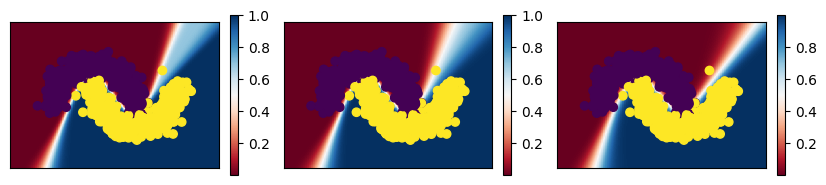

In [612]:
# Plot heatmap of average prediction
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
titles = ['Standard', 'Perturbed', 'Bezier']
for i, z in enumerate([Z, Z_pert, Z_mode]):
    im = ax[i].imshow(z.mean(axis=0), extent=extent, origin='lower', cmap='RdBu')
    fig.colorbar(im, fraction=0.035)
    ax[i].scatter(trainset.data[:, 0], trainset.data[:, 1], c=trainset.labels)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

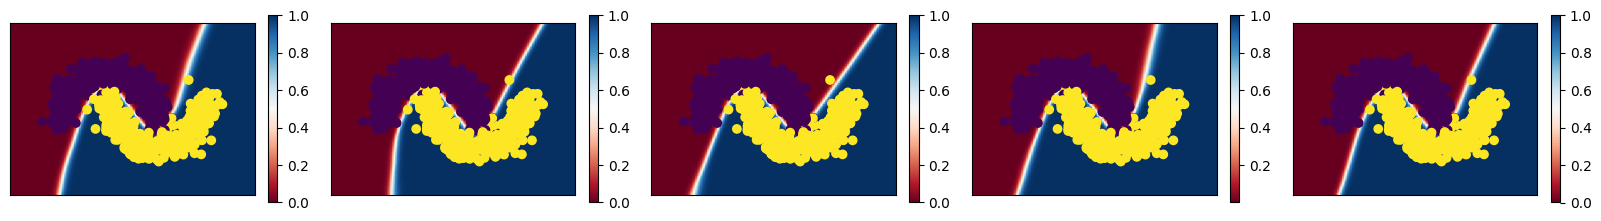

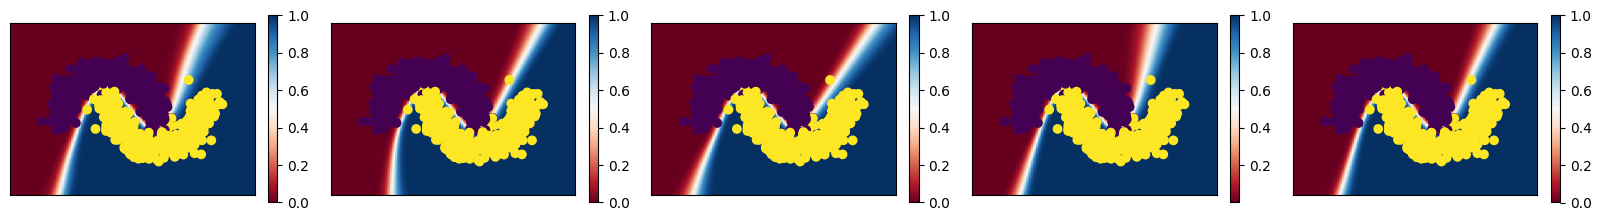

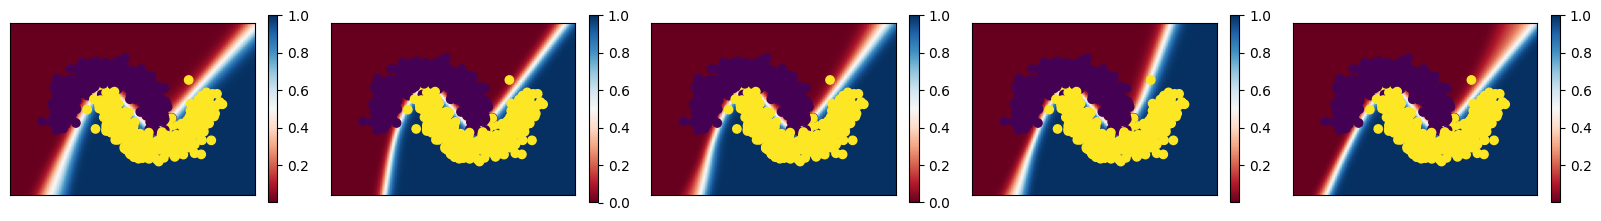

In [614]:
# Plot heatmap of 5 models predictions
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    Z = models[i](torch.FloatTensor(X)).detach().numpy()[:, 1].reshape(xx.shape)
    im = ax[i].imshow(Z, extent=extent, origin='lower', cmap='RdBu')
    fig.colorbar(im, fraction=0.035)
    ax[i].scatter(trainset.data[:, 0], trainset.data[:, 1], c=trainset.labels)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    Z = pert_models[i](torch.FloatTensor(X)).detach().numpy()[:, :, 1].mean(axis=0).reshape(xx.shape)
    im = ax[i].imshow(Z, extent=extent, origin='lower', cmap='RdBu')
    fig.colorbar(im, fraction=0.035)
    ax[i].scatter(trainset.data[:, 0], trainset.data[:, 1], c=trainset.labels)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    Z = mode_models[i].compute_logits(X, TabularModel, ts)[:, :, 1].mean(axis=0).reshape(xx.shape)
    im = ax[i].imshow(Z, extent=extent, origin='lower', cmap='RdBu')
    fig.colorbar(im, fraction=0.035)
    ax[i].scatter(trainset.data[:, 0], trainset.data[:, 1], c=trainset.labels)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.show()

### Ensembles

In [635]:
def get_grads(method, idx):
    if method == 'average':
        grads = models[idx].compute_gradients(torch.FloatTensor(X), return_numpy=True)
    elif method == 'perturb':
        grads = pert_models[idx].compute_gradients(X, mean=True)
    elif method == 'mode_connect':
        grads = mode_models[idx].compute_gradients(X, TabularModel, ts).mean(axis=0)
    return grads

In [636]:
methods = ['average', 'perturb', 'mode_connect']
grads = np.zeros((len(methods), n_models, X.shape[0], 2))
from datasets.tabular import TabularModel
for i, method in enumerate(methods):
    for j in tqdm(range(n_models)):
        # Compute gradients
        grads[i,j] = get_grads(method, j)

100%|██████████| 200/200 [00:56<00:00,  3.51it/s]


In [637]:
# Parameters
ensemble_sizes = [1, 2, 5, 10]
n_trials = 20
k = 1

# Compute statistics
e_grads = np.zeros((len(methods), len(ensemble_sizes), n_trials, X.shape[0], 2))
angles = np.zeros((len(methods), len(ensemble_sizes), X.shape[0]))
cosines = np.zeros((len(methods), len(ensemble_sizes), X.shape[0]))
topk = np.zeros((len(methods), len(ensemble_sizes), n_trials, X.shape[0], k))
signs = np.zeros((len(methods), len(ensemble_sizes), n_trials, X.shape[0], k), dtype=int)
sa = np.zeros((len(methods), len(ensemble_sizes), X.shape[0]))

from datasets.tabular import TabularModel
for i, method in enumerate(methods):
    for j, ensemble_size in enumerate(tqdm(ensemble_sizes)):
        e_grads[i,j] = grads[i].reshape(-1, ensemble_size, *X.shape)[:n_trials].mean(axis=1)
        angles[i,j] = average_pairwise_score_grad(e_grads[i,j], angle_diff)
        cosines[i,j] = average_pairwise_score_grad(e_grads[i,j], cosine_similarity)
        topk[i,j], signs[i,j] = get_top_k(k, e_grads[i,j], return_sign=True)
        sa[i,j] = average_pairwise_score(topk[i,j], signs[i,j], top_k_sa)

100%|██████████| 4/4 [01:00<00:00, 15.11s/it]


In [653]:
def plot_methods(sim, idx, vmin, vmax, sep, scale=2.5, cmap='RdYlGn_r'):
    v = np.arange(vmin, vmax, sep)
    for j, method in enumerate(methods):
        fig, ax = plt.subplots(1, len(ensemble_sizes), figsize=(4*len(ensemble_sizes), 3), dpi=150)
        plt.subplots_adjust(wspace=0.2)
        for i, ensemble_size in enumerate(ensemble_sizes):
            Z = sims[sim][j,i].reshape(xx.shape)
            im = ax[i].imshow(Z, vmin=vmin, vmax=vmax, extent=extent, origin='lower', cmap=cmap)
            fig.colorbar(im, fraction=0.035, boundaries=v)
            ax[i].quiver(np.repeat(X[idx,0], n_trials), np.repeat(X[idx,1], n_trials),
                        e_grads[j, i, :, idx, 0], e_grads[j, i, :, idx, 1],
                        angles='xy', scale_units='xy', scale=scale, color='black')
            ax[i].set_title(f'Ensemble size: {ensemble_size}')
            ax[i].set_xticks([]); ax[i].set_yticks([])
        plt.suptitle(f'Average pairwise {sim} difference ({titles[j]})')
        plt.show()

titles = ['Average', 'Perturb', 'Mode Connect']
sims = {'angle difference': angles,
        'cosine similarity': cosines,
        'sign agreement': sa}

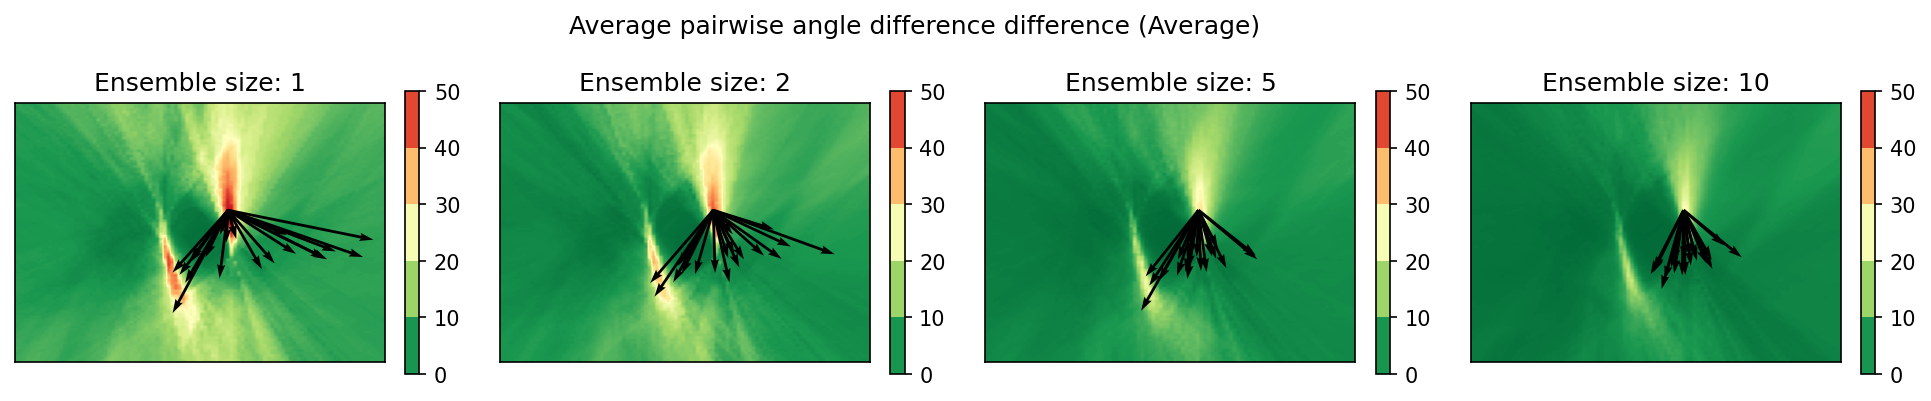

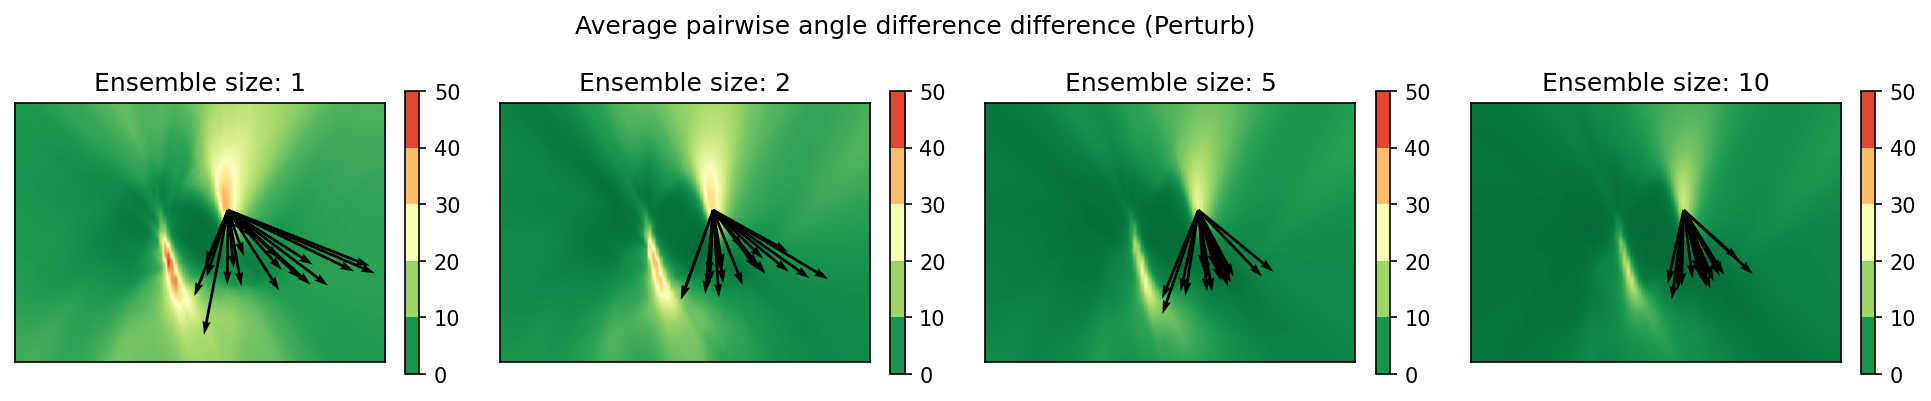

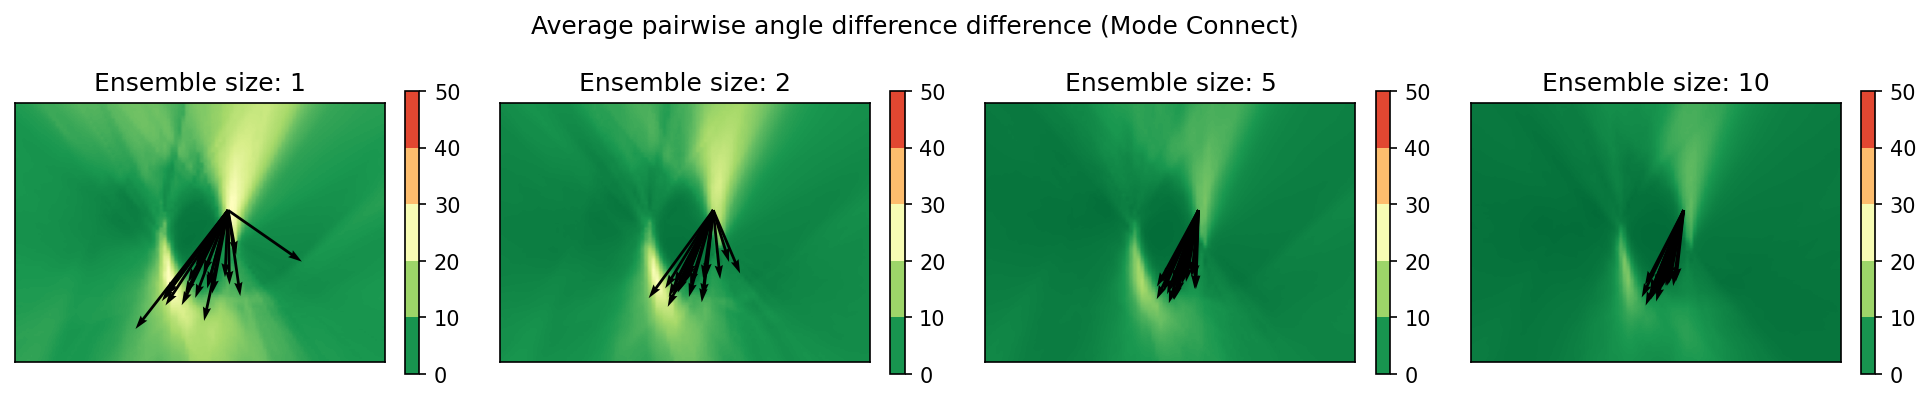

In [677]:
# Plot heatmap of angles
idx = np.argmax(angles[0,0])
vmin, vmax = 0, angles[0].max()
sep = 10
plot_methods('angle difference', idx, vmin, vmax, sep, scale=2.5, cmap='RdYlGn_r')

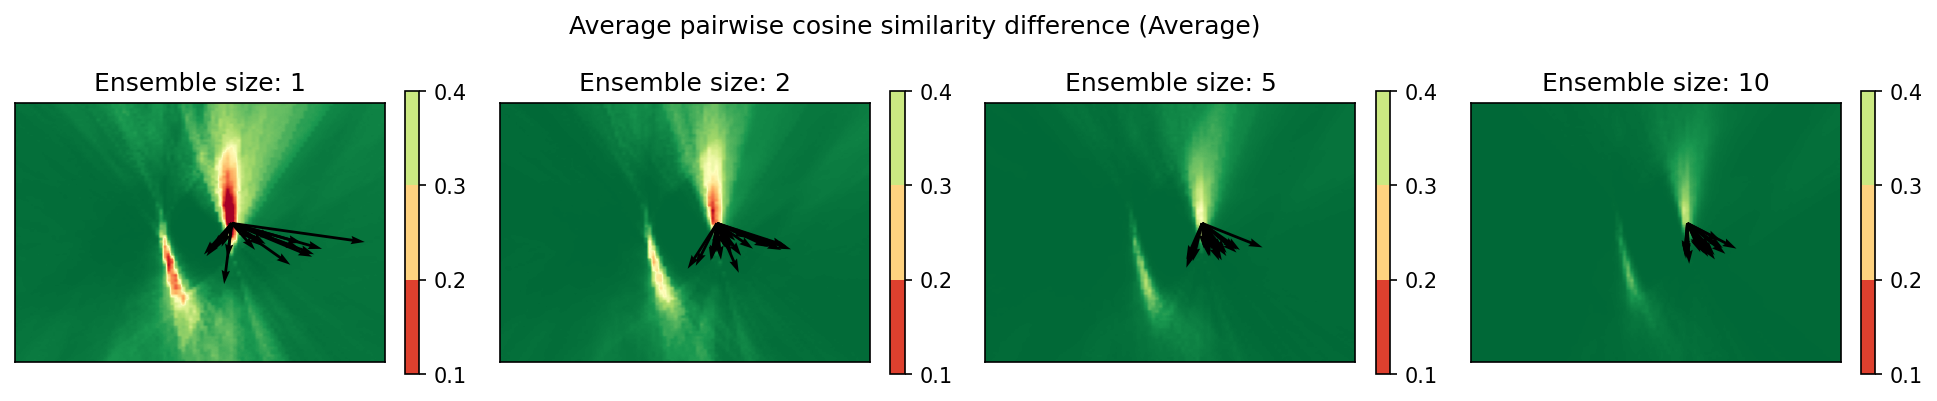

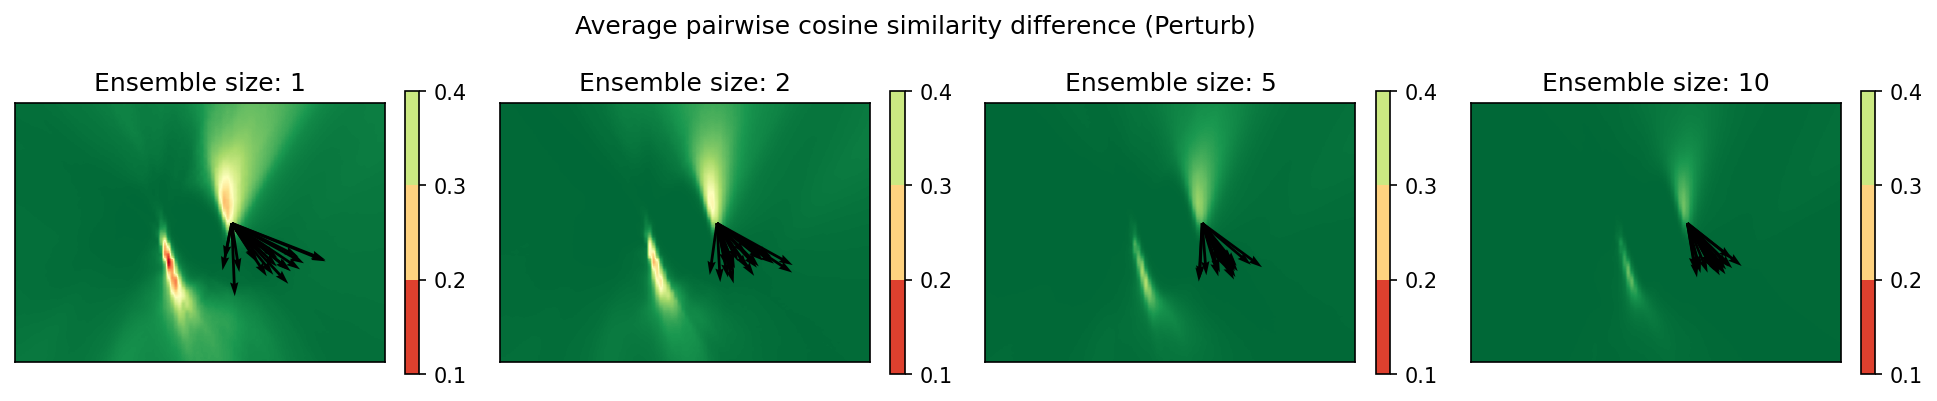

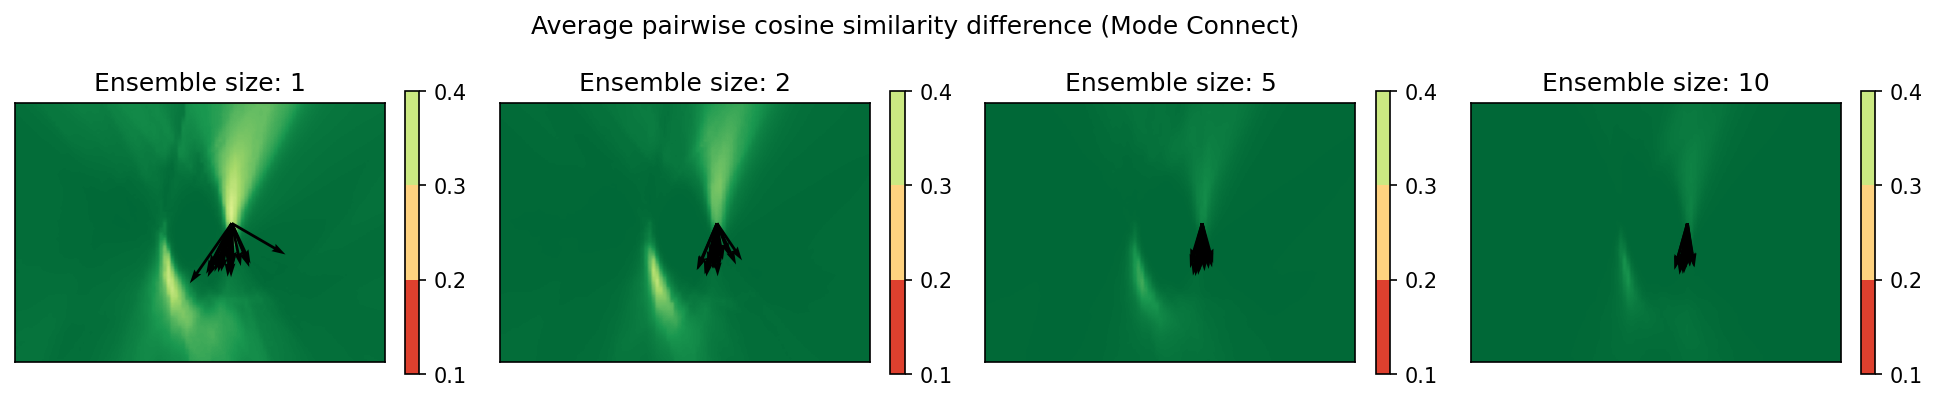

In [662]:
# Plot heatmap of cosine similarities
idx = np.argmin(cosines[0,0])
vmin, vmax = 0.1, 0.5
sep = 0.1
plot_methods('cosine similarity', idx, vmin, vmax, sep, scale=5, cmap='RdYlGn')

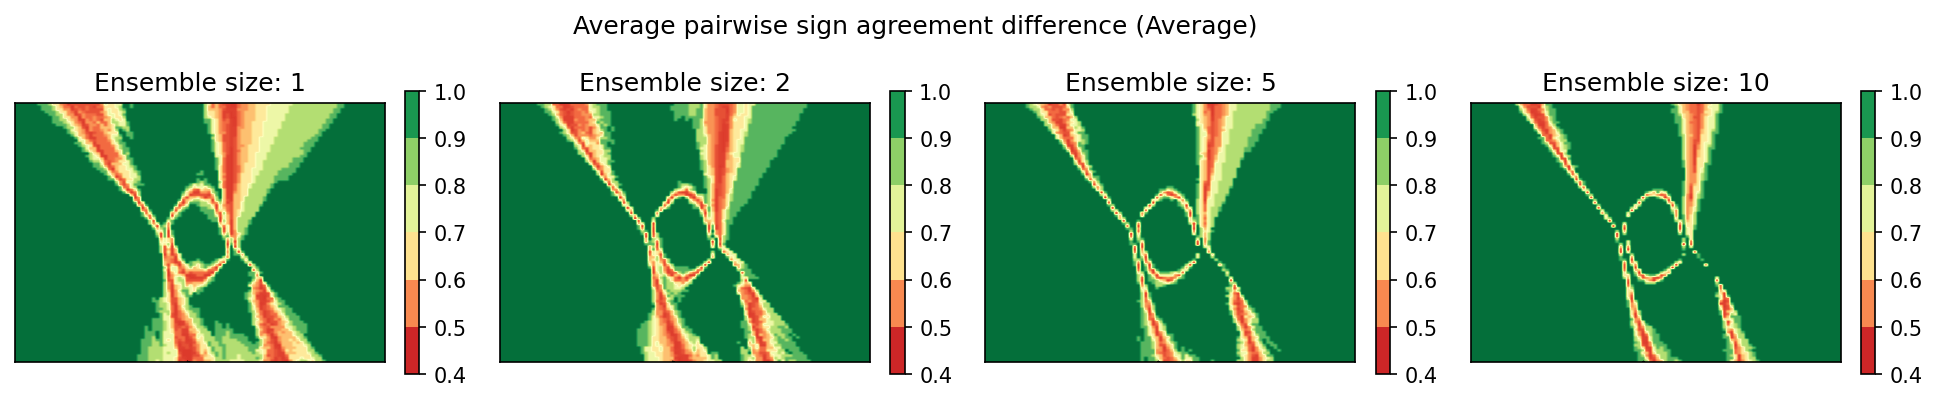

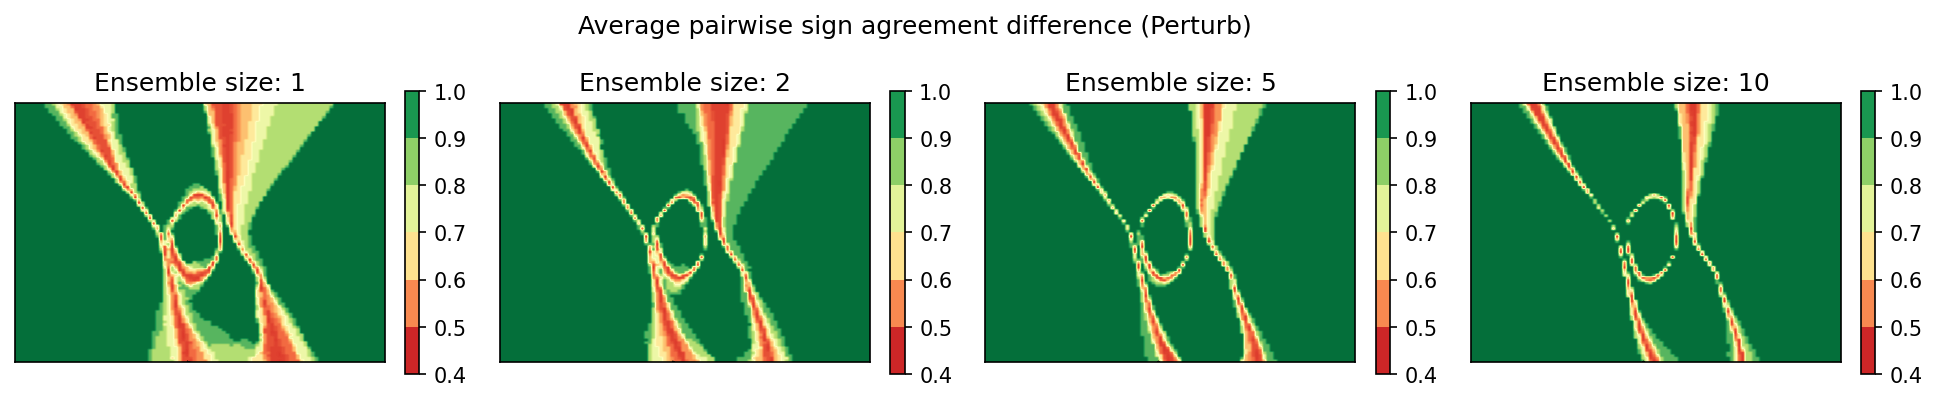

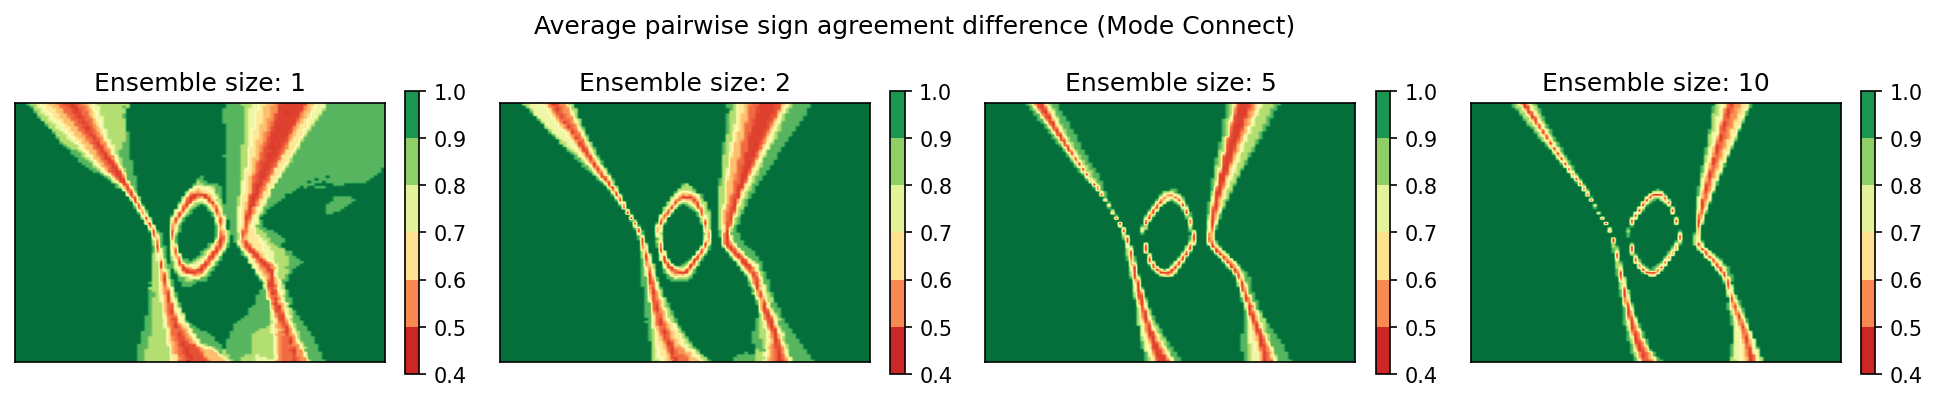

In [664]:
# Plot heatmap of sign agreements
idx = np.argmin(sa[0,0])
vmin, vmax = 0.4, 1.01
sep = 0.1
plot_methods('sign agreement', idx, vmin, vmax, sep, scale=5, cmap='RdYlGn')

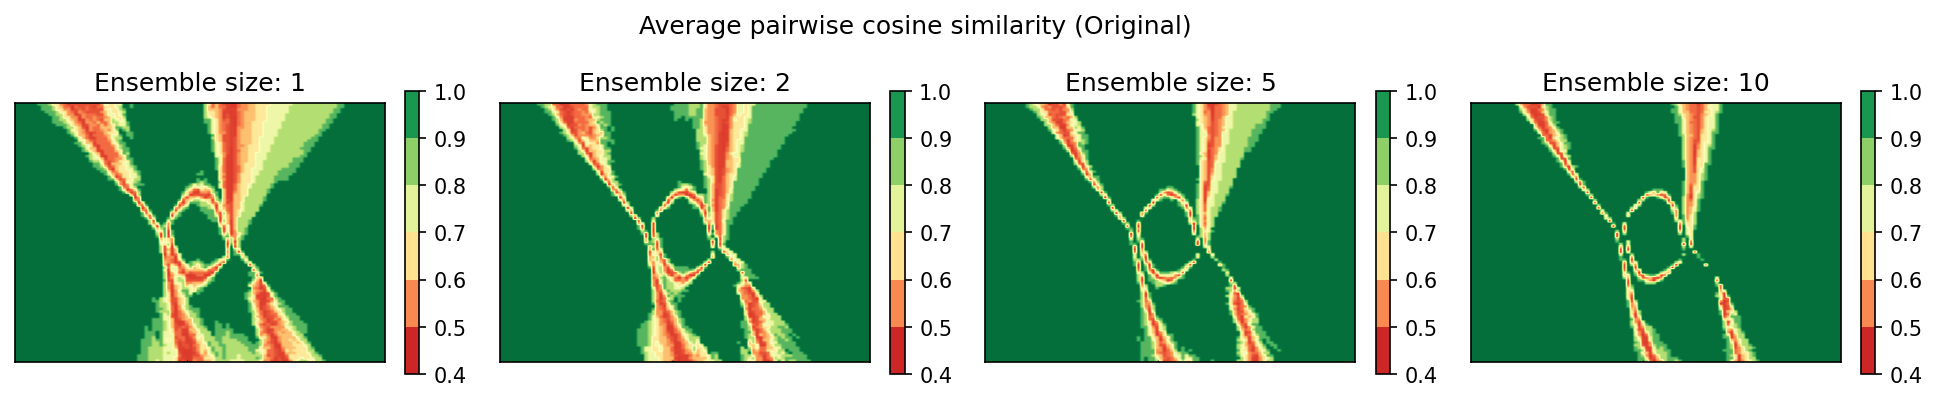

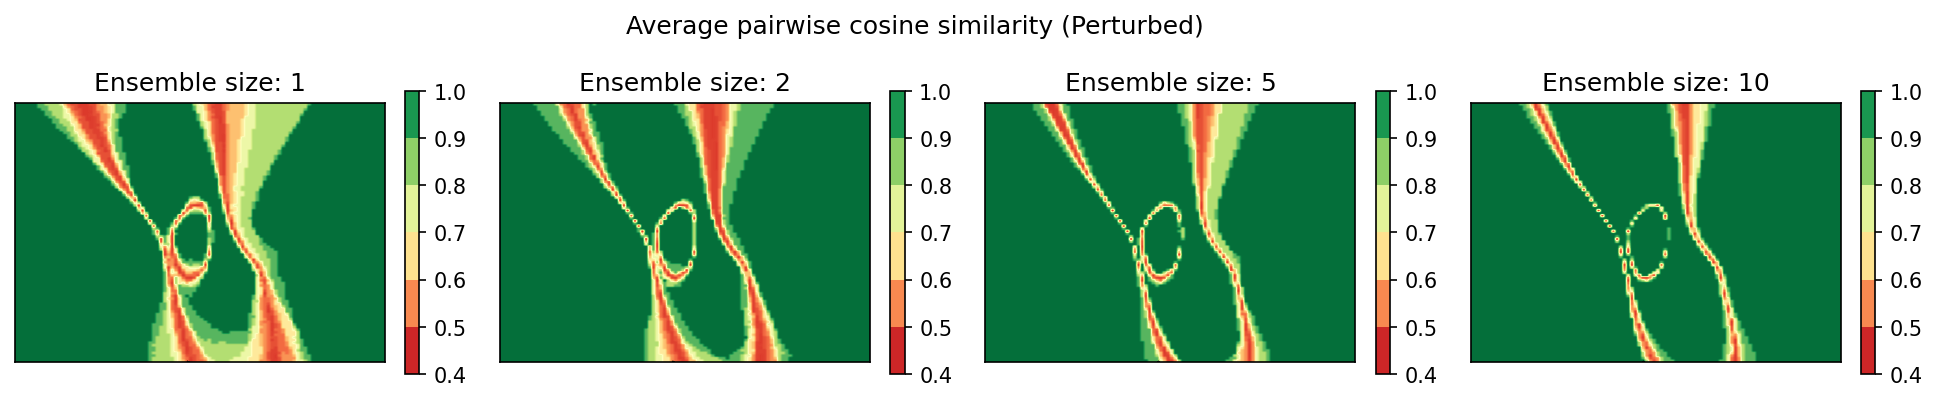

In [579]:
# Plot heatmap of angles
titles = ['Original', 'Perturbed']
idx = np.argmin(sa[0])
sims = [sa, sa_perturb]
sim_grads = [e_grads, e_grads_perturb]
vmin, vmax = 0.4, 1.01
sep = 0.1
v = np.arange(vmin, vmax, sep)
for j, sim in enumerate(sims):
    fig, ax = plt.subplots(1, len(ensemble_sizes), figsize=(4*len(ensemble_sizes), 3), dpi=150)
    plt.subplots_adjust(wspace=0.2)
    for i, ensemble_size in enumerate(ensemble_sizes):
        Z = sim[i].reshape(xx.shape)
        im = ax[i].imshow(Z, vmin=vmin, vmax=vmax, extent=extent, origin='lower', cmap='RdYlGn')
        fig.colorbar(im, fraction=0.035, boundaries=v)
        ax[i].quiver(np.repeat(X[idx,0], n_trials), np.repeat(X[idx,1], n_trials),
                     sim_grads[j][i, :, idx, 0], sim_grads[j][i, :, idx, 1],
                     angles='xy', scale_units='xy', scale=2.5, color='black')
        ax[i].set_title(f'Ensemble size: {ensemble_size}')
        ax[i].set_xticks([]); ax[i].set_yticks([])
    plt.suptitle(f'Average pairwise cosine similarity ({titles[j]})')
    plt.show()

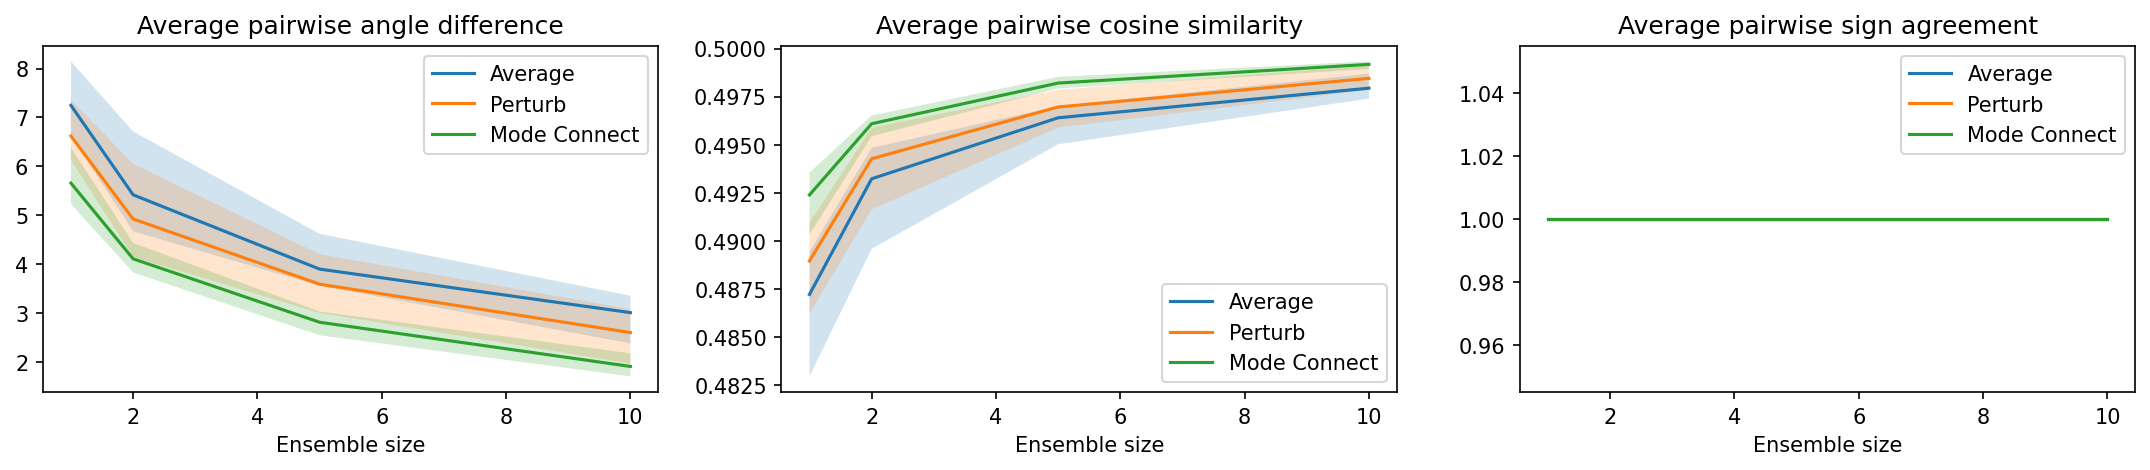

In [671]:
fig, ax = plt.subplots(1, len(sims), figsize=(6*len(sims), 3), dpi=150)
for i, sim in enumerate(sims):
    for j, method in enumerate(methods):
        q = np.quantile(sims[sim][j], [0.4, 0.5, 0.6], axis=1)
        ax[i].plot(ensemble_sizes, q[1], label=titles[j])
        ax[i].fill_between(ensemble_sizes, q[0], q[2], alpha=0.2)
    ax[i].set_xlabel('Ensemble size')
    ax[i].set_title(f'Average pairwise {sim}')
    ax[i].legend()
plt.show()

### Misc

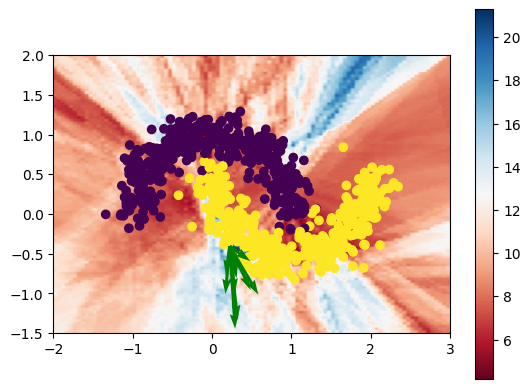

In [ ]:
# Plot heatmap of sa
idx = 3144
Z = angles.reshape(xx.shape)
plt.imshow(Z, extent=[-2, 3, -1.5, 2], origin='lower', cmap='RdBu')
plt.colorbar()
plt.scatter(trainset.data[:, 0], trainset.data[:, 1], c=trainset.labels)
plt.quiver(np.repeat(X[idx,0], n_models), np.repeat(X[idx,1], n_models), grads[:, idx, 0], grads[:, idx, 1], scale=15, color='green')
plt.show()

In [74]:
k = 1
tk, s = get_top_k(k, grads, return_sign=True)
sa = average_pairwise_score(tk, s, top_k_sa)

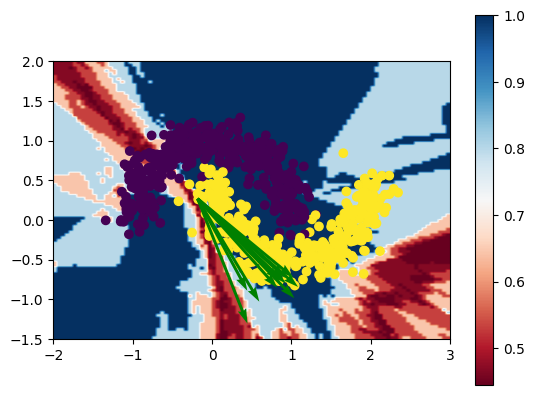

In [176]:
# Plot heatmap of sa
Z = sa.reshape(xx.shape)
plt.imshow(Z, extent=[-2, 3, -1.5, 2], origin='lower', cmap='RdBu')
plt.colorbar()
plt.scatter(trainset.data[:, 0], trainset.data[:, 1], c=trainset.labels)
plt.quiver(np.repeat(X[idx,0], n_models), np.repeat(X[idx,1], n_models), grads[:, idx, 0], grads[:, idx, 1], scale=15, color='green')
plt.show()

# Modconn

In [1138]:
from modconn.curves import train_curve
from modconn import curves
from datasets.tabular import TabularModelCurve
layers = datasets.tabular.layers['moons']
model_args = [n_features, layers]
model_args

[2, [128, 64, 16]]

In [1139]:
def mode_connect(models, trainloader, lr, epochs, curve_type='polychain', optim='sgd',
                 ts=np.linspace(0, 1, 101), disable_tqdm=True, fix_start=False, fix_end=False):
    if curve_type == 'polychain':
        curve_type = curves.PolyChain
    elif curve_type == 'bezier':
        curve_type = curves.Bezier
    else:
        raise ValueError(f'Unknown curve type {curve_type}')
    p_curve = curves.train_curve(models=models, trainloader=trainloader,
                                 curve_class=TabularModelCurve, curve=curve_type,
                                 input_size=model_args[0], hidden_layers=model_args[1],
                                 fix_start=fix_start, fix_end=fix_end, optim=optim,
                                 lr=lr, epochs=epochs, disable_tqdm=disable_tqdm)
    # Compute gradients
    p_curve_logits = p_curve.compute_logits(X_test, TabularModel, ts)
    p_curve_grads = p_curve.compute_gradients(X_test, TabularModel, ts)
    return p_curve, p_curve_logits, p_curve_grads

def init_model(idx):
    torch.manual_seed(idx)
    model = TabularModel(*model_args)
    return model

In [1140]:
def get_curve_statistics(p_curve, ts=np.linspace(0,1,101)):
    # Compute losses
    loss_fn = torch.nn.functional.cross_entropy
    p_curve_loss = np.zeros(len(ts))
    p_curve_loss_tr = np.zeros(len(ts))
    p_curve_preds_tr = np.zeros((len(ts), *y_train.shape))
    p_curve_grads_tr = np.zeros((len(ts), *X_train.shape))
    for i, t in enumerate(ts):
        model = p_curve.get_model_from_curve(TabularModel, t=t)
        p_curve_loss[i] = loss_fn(model.forward(torch.FloatTensor(X_test)), torch.tensor(y_test)).item()
        p_curve_loss_tr[i] = loss_fn(model.forward(torch.FloatTensor(X_train)), torch.tensor(y_train)).item()
        p_curve_preds_tr[i] = model.predict(X_train, return_numpy=True)
        p_curve_grads_tr[i] = model.compute_gradients(X_train, return_numpy=True)
    weight_norms = np.zeros(len(ts))
    weight_diffs = np.zeros(len(ts))
    model_0 = p_curve.get_model_from_curve(TabularModel, t=0)
    for i, t in enumerate(ts):
        model_t = p_curve.get_model_from_curve(TabularModel, t=t)
        weight_norms[i] = get_weight_norm(model_t.state_dict())
        weight_diffs[i] = get_weight_diff(model_t.state_dict(), model_0.state_dict())
    return p_curve_loss, p_curve_loss_tr, p_curve_preds_tr, p_curve_grads_tr, weight_norms, weight_diffs

def plot_statistics(p_curve_loss, p_curve_loss_tr,
                    p_curve_preds, p_curve_preds_tr,
                    p_curve_grads, p_curve_grads_tr,
                    weight_norms, weight_diffs, ts=np.linspace(0,1,101)):
    fig, ax = plt.subplots(1, 5, figsize=(20, 4), dpi=150)
    ax[0].plot(ts, p_curve_loss, label='Test')
    ax[0].plot(ts, p_curve_loss_tr, label='Train')

    ax[1].plot(ts, 100*(p_curve_preds==y_test).mean(axis=1), label='Test')
    ax[1].plot(ts, 100*(p_curve_preds_tr==y_train).mean(axis=1), label='Train')

    q = np.quantile(np.linalg.norm(p_curve_grads, axis=2), [0.25, 0.5, 0.75], axis=1)
    ax[2].plot(ts, q[1], label='Test')
    ax[2].fill_between(ts, q[0], q[2], alpha=0.2)
    q = np.quantile(np.linalg.norm(p_curve_grads_tr, axis=2), [0.25, 0.5, 0.75], axis=1)
    ax[2].plot(ts, q[1], label='Train')
    ax[2].fill_between(ts, q[0], q[2], alpha=0.2)

    topk, signs = get_top_k(1, p_curve_grads, return_sign=True)
    gt_score = ground_truth_score(topk, signs, gt, signs_gt, top_k_sa)
    q = np.quantile(gt_score, [0.25, 0.5, 0.75], axis=1)
    ax[3].plot(ts, q[1], label='Test')
    ax[3].fill_between(ts, q[0], q[2], alpha=0.2)

    ax[4].plot(ts, weight_norms, label='Weight Norm')
    ax[4].plot(ts, weight_diffs, label='Weight Diff')

    titles = ['Loss', 'Accuracy (%)', 'Gradient Norm', 'Ground Truth SA Similarity', 'Weight Norm']
    for i in range(5):
        ax[i].set_xlabel('t')
        ax[i].legend()
        ax[i].set_title(titles[i])
    plt.show()

In [1088]:
grad = np.zeros((n_models, X_test.shape[0], 2))
for i in tqdm(range(n_models)):
    # Compute gradients
    grad[i] = models[i].compute_gradients(X_test, return_numpy=True)

100%|██████████| 200/200 [00:00<00:00, 2463.67it/s]


In [1141]:
gt, signs_gt = get_top_k(1, grad.mean(axis=0), return_sign=True)
tk, s = get_top_k(1, grad, return_sign=True)
orig_sa = average_ground_truth_score(tk, s, gt, signs_gt, top_k_sa)

In [975]:
weights = linear_weight_interpolation(models[54].state_dict(), models[155].state_dict(), [0, 0.25, 0.5, 0.75, 1.0])
curve_models = []
for weight in weights:
    model = TabularModel(*model_args)
    model.load_state_dict(weight)
    curve_models.append(model)

In [1042]:
from align import align_tabular

In [1124]:
loader = torch.utils.data.DataLoader(trainset, 32, shuffle=True)
model = TabularModel(*model_args)
model.state_dict()['network.0.weight'][:3]

tensor([[ 0.3643, -0.3121],
        [-0.1371,  0.3319],
        [-0.6657,  0.4241]])

In [1170]:
ts = np.linspace(0, 1, 50)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False)
model_0 = models[9]
model_1 = models[10]
model_a = align_tabular(model_0, model_1, trainloader, model_args)
curve_models = [model_a, model_1]

In [1171]:
print(get_weight_norm(model_0), get_weight_norm(model_1), get_weight_norm(model_a))
print(get_weight_diff(model_0, model_1), get_weight_diff(model_0, model_a), get_weight_diff(model_a, model_1))

11.01916587144307 11.120580690350929 11.019166063732413
15.713755501383567 15.597638490967881 9.890983136609254


In [1179]:
n_curves = 100
ts = np.linspace(0, 1, 50)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False)
p_curve_grads = np.zeros((n_curves, len(ts), X_test.shape[0], 2))
p_curves = []
for i in tqdm(range(n_curves)):
    model_0 = models[i*2]
    model_1 = models[i*2+1]
    model_a = align_tabular(model_0, model_1, trainloader, model_args)
    curve_models = [model_a, model_1]
    p_curve, p_curve_logits, p_curve_grads[i] = mode_connect(curve_models, trainloader=trainloader, lr=0.1, optim='sgd',
                                                        epochs=100, curve_type='bezier', ts=ts,
                                                        disable_tqdm=True, fix_start=False, fix_end=True)
    p_curves.append(p_curve)
    # outputs = get_curve_statistics(p_curve, ts=ts)
    # p_curve_loss, p_curve_loss_tr, p_curve_preds_tr, p_curve_grads_tr, weight_norms, weight_diffs = outputs
    # plot_statistics(p_curve_loss, p_curve_loss_tr, p_curve_logits.argmax(axis=2), p_curve_preds_tr,
    #                 p_curve_grads, p_curve_grads_tr, weight_norms, weight_diffs, ts=ts)

100%|██████████| 100/100 [03:51<00:00,  2.32s/it]


In [1181]:
len(pert_models)

200

In [1228]:
idx = 5858
x = X[idx:idx+1]
#p_curve = mode_models[8]
pg = grads[0,:198,idx].reshape(3, 66, 2).mean(axis=0)
pg_mode = np.zeros((n_curves, 2))
pg_pert = np.zeros((len(pert_models), 2))
for i in tqdm(range(n_curves)):
    pg_mode[i] = p_curves[i].compute_gradients(x, TabularModel, ts=np.linspace(0,1,100))[:,0].mean(axis=0)
for i in tqdm(range(len(pert_models))):
    pg_pert[i] = pert_models[i].compute_gradients(x, mean=True)
pg_pert = pg_pert[:198].reshape(3, 66, 2).mean(axis=0)
pg_mode = pg_mode[:66]
x = x[0]

100%|██████████| 200/200 [00:01<00:00, 109.63it/s]


In [1211]:
def x_angle(g):
    angs = np.zeros(len(g))
    for i in range(len(g)):
        angs[i] = np.arctan(g[i,1]/g[i,0])*180/np.pi
    return angs

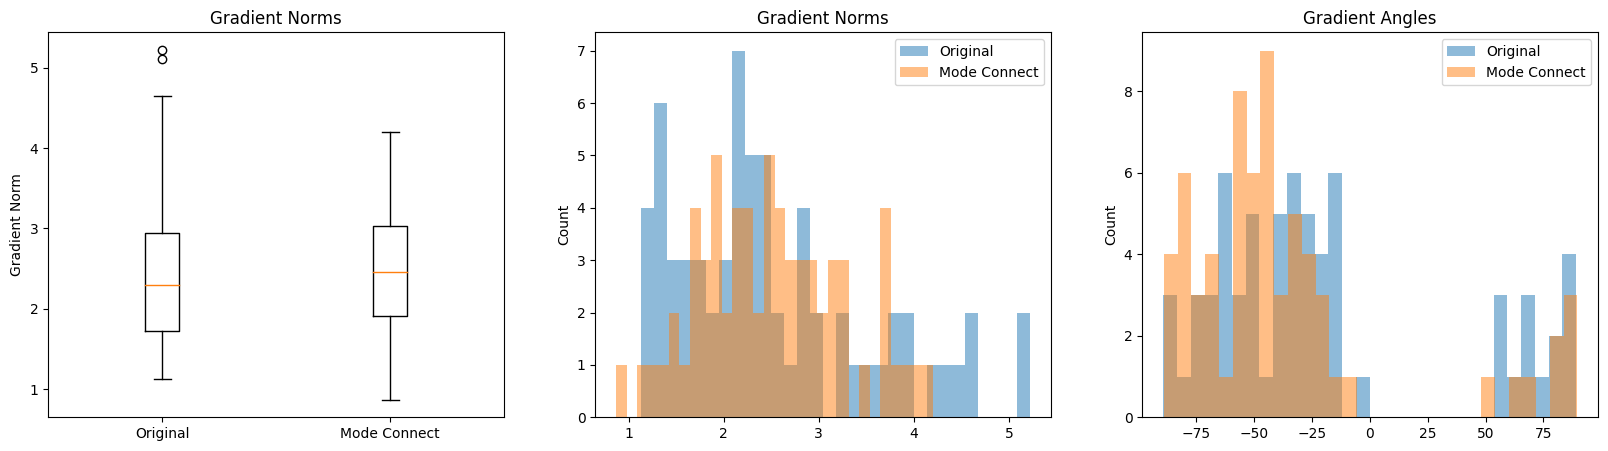

In [1240]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), dpi=100)
method_grads = [pg_mode, pg]
ax[0].boxplot([np.linalg.norm(g, axis=1) for g in method_grads],
             labels=['Original', 'Mode Connect'])
ax[0].set_title('Gradient Norms')
for g in method_grads:
    ax[1].hist(np.linalg.norm(g, axis=1), bins=30, alpha=0.5)
    ax[2].hist(x_angle(g), bins=30, alpha=0.5)
ax[0].set_ylabel('Gradient Norm')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Count')
ax[1].legend(['Original', 'Mode Connect'])
ax[2].legend(['Original', 'Mode Connect'])
ax[1].set_title('Gradient Norms')
ax[2].set_title('Gradient Angles')
plt.show()

In [1238]:
pg.shape, pg_mode.shape, pg_pert.shape

((66, 2), (100, 2), (66, 2))

In [1244]:
pg_mode.shape

(66, 2)

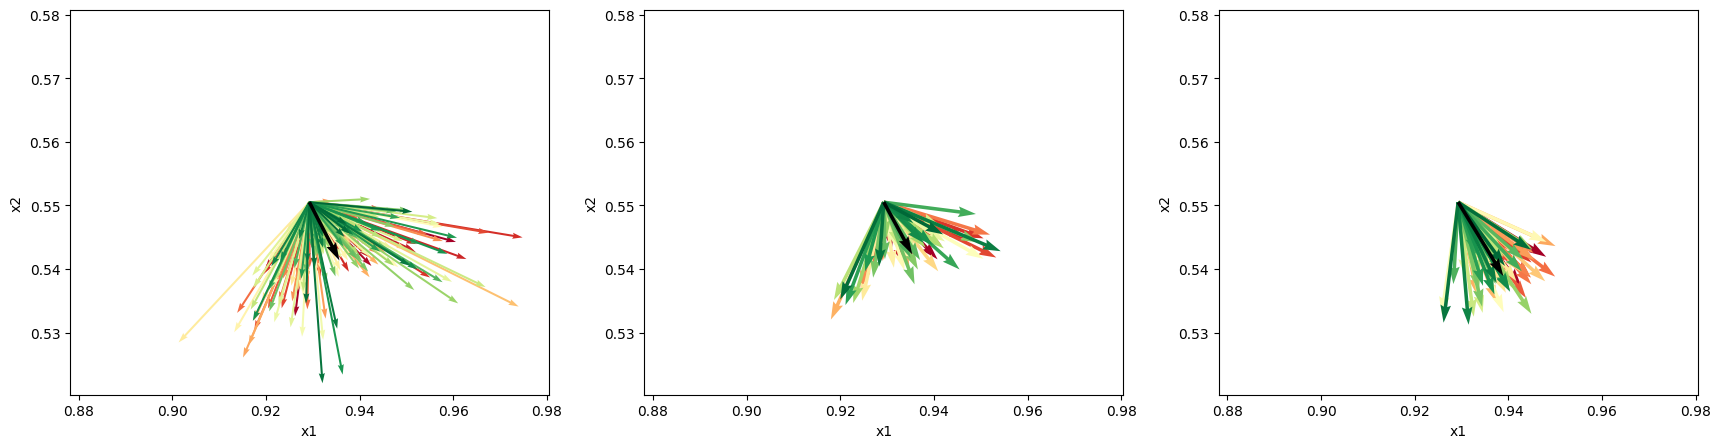

In [1242]:
quiver_plots([grads[0,:,idx], pg_mode, pg_pert], x, scale=200)

In [1082]:
def quiver_plot(pg, x, scale=1.0):
    # Plot the gradients in pg as a quiver plot at x
    n_grads = pg.shape[0]
    plt.quiver(np.repeat(x[0], n_grads),
               np.repeat(x[1], n_grads),
               pg[:,0], pg[:,1], angles='xy',
               scale_units='xy', scale=scale,
               color=cmaps['RdYlGn'](np.linspace(0,1,n_grads)))
    # start_end_pg_x = [pg[0,0], pg[-1,0]]
    # start_end_pg_y = [pg[0,1], pg[-1,1]]
    # plt.quiver(np.repeat(x[0], 2),
    #            np.repeat(x[1], 2),
    #            start_end_pg_x, start_end_pg_y,
    #            angles='xy', scale_units='xy',
    #            scale=scale, color='black')
    mean_pg_x = pg.mean(axis=0)[0]
    mean_pg_y = pg.mean(axis=0)[1]
    # Dotted quiver
    plt.quiver(np.repeat(x[0], 1),
                np.repeat(x[1], 1),
                mean_pg_x, mean_pg_y,
                angles='xy', scale_units='xy',
                scale=scale, color='black')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [1189]:
def quiver_plots(pgs, x, scale=1.0):
    # As above, but for multiple sets of gradients (one per column of plot)
    n_cols = len(pgs)
    fig, ax = plt.subplots(1, n_cols, figsize=(n_cols*7, 5), dpi=100)
    for i, pg in enumerate(pgs):
        n_grads = pg.shape[0]
        ax[i].quiver(np.repeat(x[0], n_grads),
                       np.repeat(x[1], n_grads),
                       pg[:,0], pg[:,1], angles='xy',
                       scale_units='xy', scale=scale,
                       color=cmaps['RdYlGn'](np.linspace(0,1,n_grads)))
        mean_pg_x = pg.mean(axis=0)[0]
        mean_pg_y = pg.mean(axis=0)[1]
        # Dotted quiver
        ax[i].quiver(np.repeat(x[0], 1),
                        np.repeat(x[1], 1),
                        mean_pg_x, mean_pg_y,
                        angles='xy', scale_units='xy',
                        scale=scale, color='black')
        ax[i].set_xlabel('x1')
        ax[i].set_ylabel('x2')
    plt.show()